<center>
<span style="color:red">
TER 
</span>
</center>
 <center>
    <span style= "color:black">
        MASTER MAS PARCOURS MSS 2021/2022
    </span>
</center>
<br>
<br/>
<center>
<span style="color:blue">
MARCHE ALÉATOIRE MINIMALE ET LOI DE MITTAG-LEFFLER 
</span>
</center>
<center>
    <span style = "color:black">
IMBERT Guilhelm, ROBERT Ambre et TRABADO Cédric
    </span>
    </center>

Ce notebook Jupyter comporte uniquement les codes Pyhton que nous avons créés pour notre TER sur **"la marche aléatoire minimale et la loi de Mittag-Leffler"**. 

In [1]:
import matplotlib.pyplot as plt
from numpy import *
from mpmath import mp
from numpy import *
from random import *
import numpy.random as npr
import scipy.stats

# I - Loi de Mittag-Leffler

## Densité 

Pour $\alpha \in ~ ]0;1[$ la fonction densité de X est donnée par : 
$$f_{\alpha}\left(x\right) = \frac{1}{\pi \alpha} \sum_{k=0}^{+ \infty} \Gamma(\alpha k + 1)~sin(\pi \alpha k)~ \frac{(-x)^{k-1}}{k!} \mathbf{1}_{x>0} $$

<ipython-input-7-b59f9cbb6b24>:14: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


Text(0.5, 1.0, "Densité d'une loi de Mittag-Leffler de paramètre 0.7")

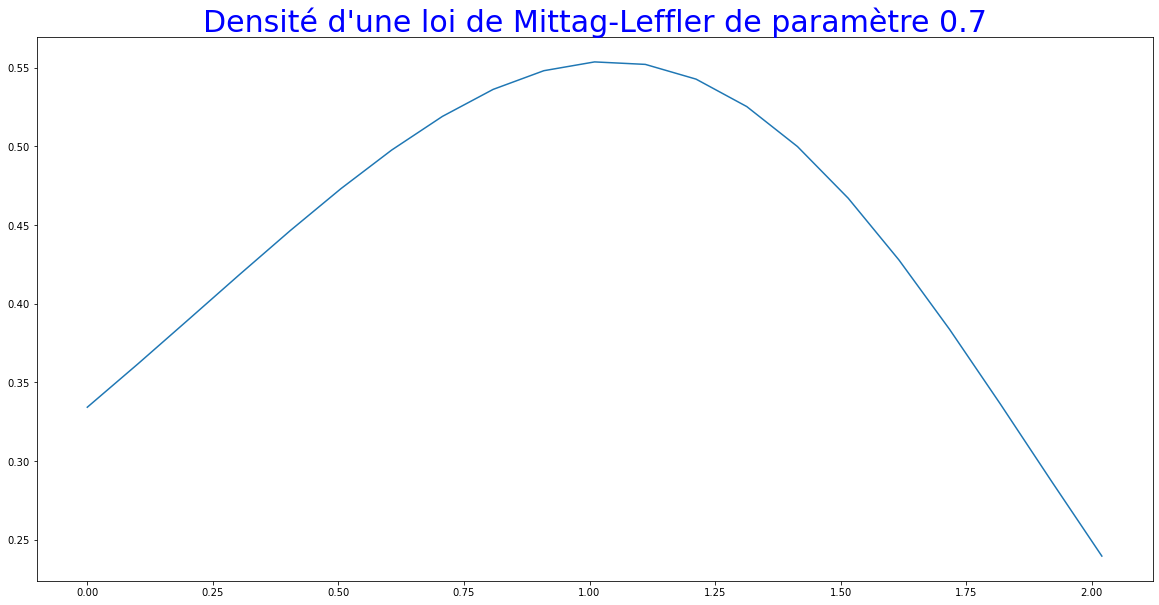

In [7]:
n=10**3
def f(a, n, u): 
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)

param = 0.7
plt.figure(figsize=(20,10))
x = linspace(0, 10, 100)
y = f(param, n, x)
plt.plot(x, y)
plt.title("Densité d'une loi de Mittag-Leffler de paramètre " + str(param), fontsize = 30, color= "blue")

Pour $\alpha=1/2$ on a : 
    $$f_{1/2}\left(x\right)=\frac{1}{\sqrt{\pi}}  e^{-\frac{x^2}{4}} \mathbf{1}_{x>0}$$
Cette densité correspond à celle d'une variable aléatoire $|Z|$ où $Z$ suit une loi normale $\mathcal{N}\left(0,2\right)$.

Text(0.5, 1.0, "Simulation d'une distribution de Mittag-Leffler de paramètre 1/2")

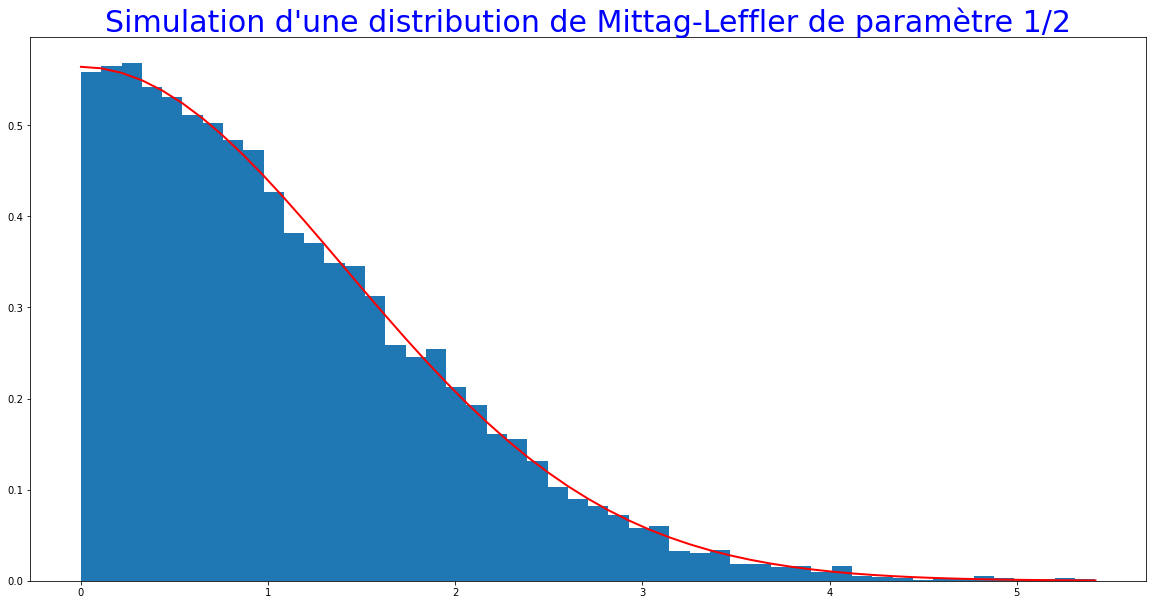

In [7]:
Z = npr.normal(0,sqrt(2),10**4)

plt.figure(figsize=(20,10))
count, bins, ignored = plt.hist(abs(Z), 50, density=True)
plt.plot(bins, 1/(sqrt(pi)) *exp( - bins**2 / 4 ),
         linewidth=2, color='r')
plt.show
plt.title("Simulation d'une distribution de Mittag-Leffler de paramètre 1/2", fontsize = 30, color= "blue")

## Simulation de la loi de Mittag-Leffler

### 1) 1ère piste

Nous avons tenté de simuler de manière générale une distribution de Mittag-Leffler pour un paramètre $\alpha \in [0;1]$. 

Soient $X$ une variable aléatoire qui suit une loi de Mittag-Leffler de paramètre $\alpha$ et $Z$ une variable aléatoire qui suit une loi $\alpha$-stable. Alors on a : 
$$X = \frac{1}{(\alpha Z)^\alpha}$$ 

Par la la méthode de Chambers, Mallows et Stuck : 

Pour $\alpha \neq 1$  $$Z = (1+\zeta^2)^{\frac{1}{2\alpha}} \frac{sin(\alpha(U + \xi))}{(cos(U))^{\frac{1}{\alpha}}} \left( \frac{cos(U - \alpha(U + \xi))}{W}\right)^\frac{1-\alpha}{\alpha}$$ 
où $U \sim \mathcal{U}(\frac{-\pi}{2}; \frac{\pi}{2})$  ,  $\zeta = -\beta\tan\frac{\pi\alpha}{2}$   et  $\xi=\frac{1}{\alpha} \arctan(-\zeta)$

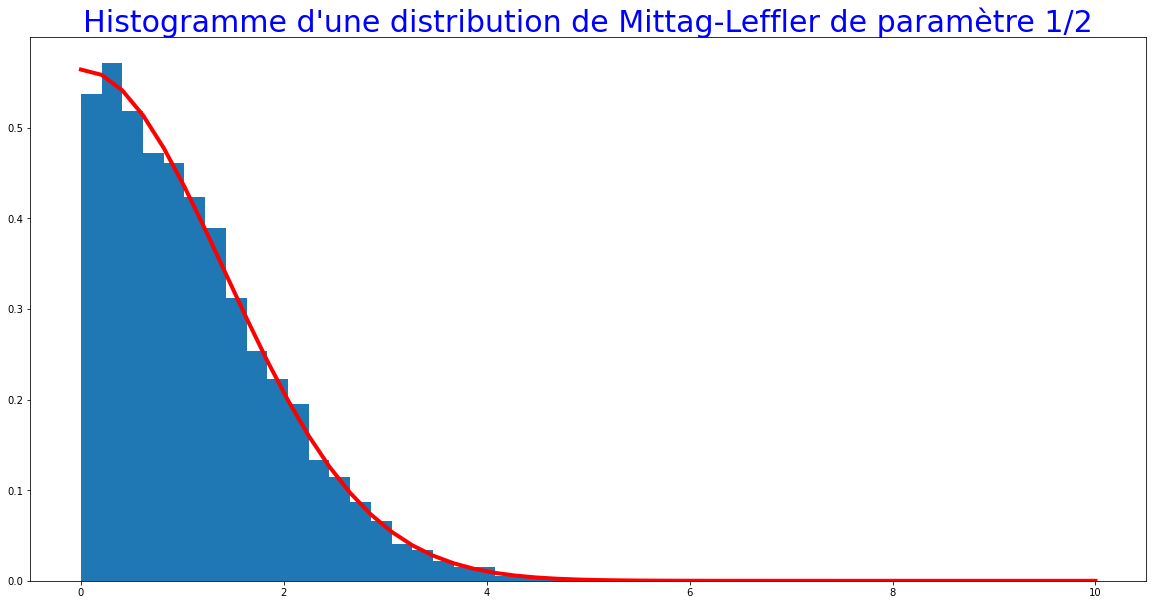

In [6]:
N = 10**4
alpha = 0.5
U = npr.uniform(-pi/2, pi/2, N)
W = - log(npr.uniform(0, 1, N))
dzeta = - tan(pi*alpha / 2)
ksi = arctan(-dzeta)/alpha
X = (1+dzeta**2)**(1/(2*alpha)) * sin(alpha*(U+ksi)) / (cos(U))**(1/alpha) * (cos(U-alpha*(U+ksi))/W)**((1-alpha)/alpha)

Z = 1/(alpha*X)**alpha

def fz(x):
    return exp(-1/(2*x))/(sqrt(2*pi) * x**(3/2))


plt.figure(figsize = (20,10))
plt.hist(1/((alpha*X)**alpha), bins = linspace(0, 10, 50), density = True);
plt.title("Histogramme d'une distribution de Mittag-Leffler de paramètre 1/2", fontsize = 30, color='blue' )
x = linspace(0,10,50)
#plt.plot(x, (4/((x)**3)) * fz(2/(x**2)), 'g', lw = 4)
plt.plot(x, 1/(sqrt(pi))*exp(- x**2/4) , 'r', lw = 4)

D'après la simulation, le cas $\alpha = 1/2$ est vérifié. On essaie ensuite un paramètre différent.

<ipython-input-1-095dfc1e422f>:9: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


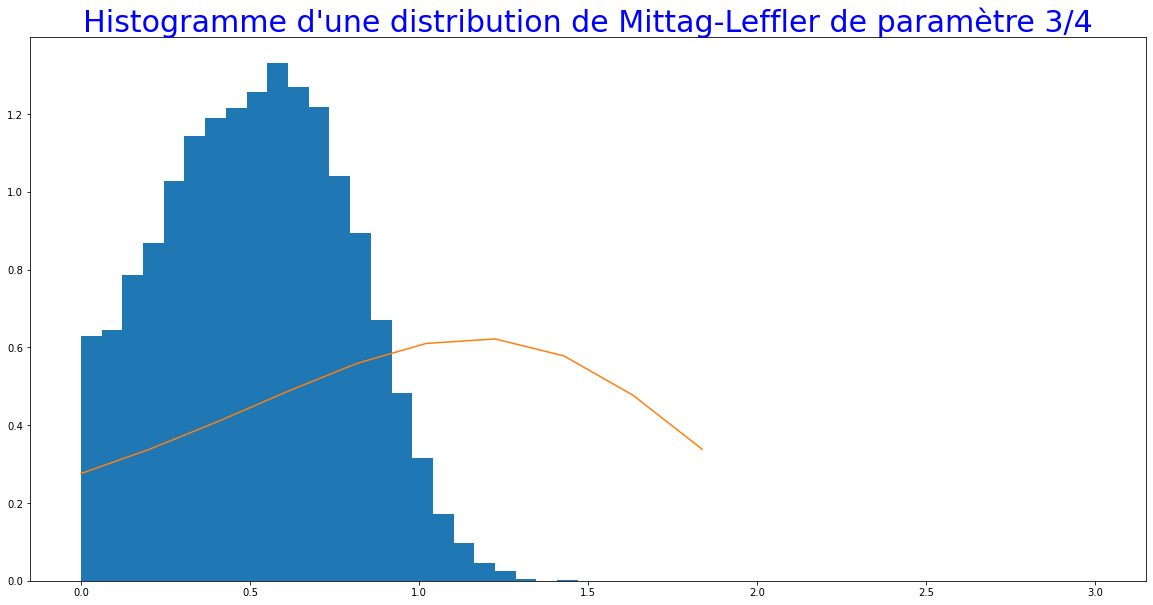

In [18]:
N = 10**4
alpha = 3/4
U = npr.uniform(-pi/2, pi/2, N)
W = - log(npr.uniform(0, 1, N))
dzeta = - tan(pi*alpha / 2)
ksi = arctan(-dzeta)/alpha
X = (1+dzeta**2)**(1/(2*alpha)) * sin(alpha*(U+ksi)) / (cos(U))**(1/alpha) * (cos(U-alpha*(U+ksi))/W)**((1-alpha)/alpha)

Z = 1/(alpha*X)**alpha



plt.figure(figsize = (20,10))
plt.hist(1/((alpha*X)**alpha), bins = linspace(0, 3, 50), density = True);
plt.title("Histogramme d'une distribution de Mittag-Leffler de paramètre 3/4", fontsize = 30, color='blue' )
x = linspace(0,10,50)

plt.plot(x, f(alpha,10**3,x))

Au vue de cette simualtion, il semble que la la formule $X = \frac{1}{(\alpha Z)^\alpha}$ ne permette pas de simuler des distributions de Mittag-Leffler de paramètres différents de 1/2. (Et particulièrement pour des paramètres $\alpha > 1/2$.)

Cette dernière méthode étant finalement peu concluante nous allons tenter de simuler une loi de Mittag-Leffler d'une autre façon.

### 2) Cas $\frac{1}{2^m}$

#### Méthode vu dans le livre de Loic Chaumont et Marc Yor pages 126 et 127

Soit $\Sigma_\alpha$ la loi
de ML($\alpha$).

1) Si $\alpha=1/2$, $\Sigma_1/2$ a même loi que
$(2 N_1^2)^{1/2}= \sqrt{2}*|N_1|$ où N_1 est une gaussienne $N(0,1)$.

2) Si $\alpha=1/4$, $\Sigma_1/4$ a même loi que
$(8 N_1^2 (N_2)^4)^{1/4}=2^{3/4} |N_1|^{1/2} |N_2|$  où $N_1$ et $N_2$ sont des

gaussiennes indépendantes et de même loi $N(0,1)$.

3) De manière plus générale, s'il existe un entier $m \geq 1$ tel que

$\alpha=1/(2^m)$, alors $\Sigma_\alpha$ a même loi que
$$(2^{2^m - 1} N_1^2 (N_2)^4 \dots (N_m)^{2^m})^{1/(2^m)} $$
où $N_1$, $N_2$, $N_m$ sont des gaussiennes indépendantes et de même loi $N(0,1)$.

Text(0.5, 1.0, "Histogramme d'une distribution de Mittag-Leffler de paramètre 1/2")

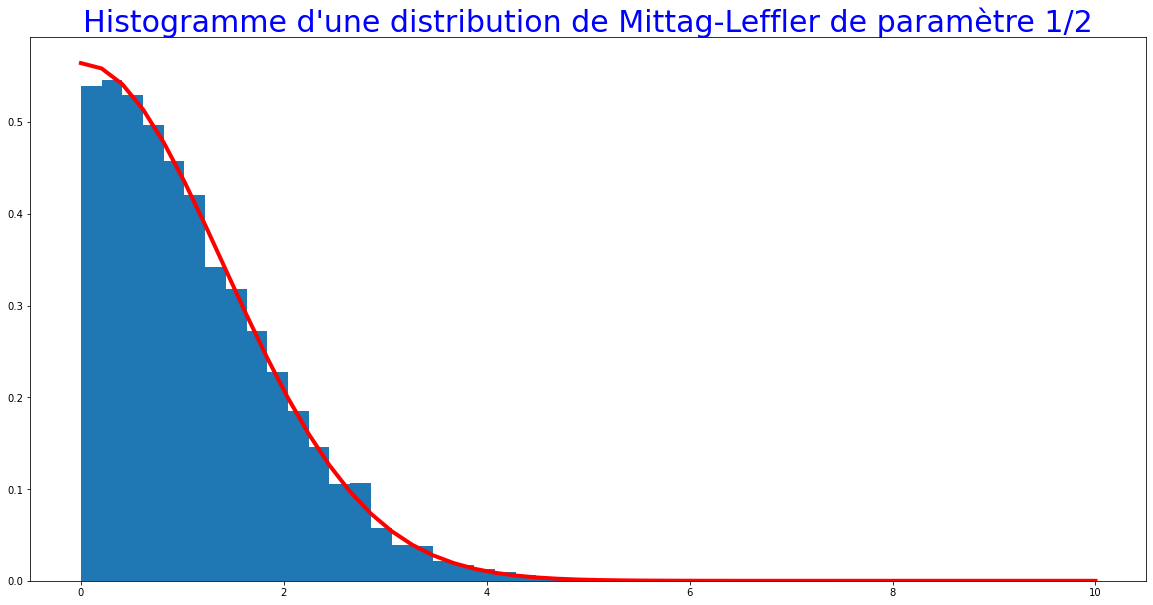

In [100]:
N = 10**4
N1 = normale=npr.normal(0,1,N)
X = (2*N1**2)**(1/2)

plt.figure(figsize = (20,10))
x = linspace(0,10,50)
plt.hist(X, bins = linspace(0, 10, 50), density = True)
plt.plot(x, 1/(sqrt(pi))*exp(- x**2/4) , 'r', lw = 4)
plt.title("Histogramme d'une distribution de Mittag-Leffler de paramètre 1/2", fontsize = 30, color='blue')

Cette méthode est vérifiée par nos simulations pour $\alpha = 1/2$. Vérifions pour un paramètre $\alpha =1/4$.

1.681792830507429


<ipython-input-8-d9f5f3aed255>:7: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


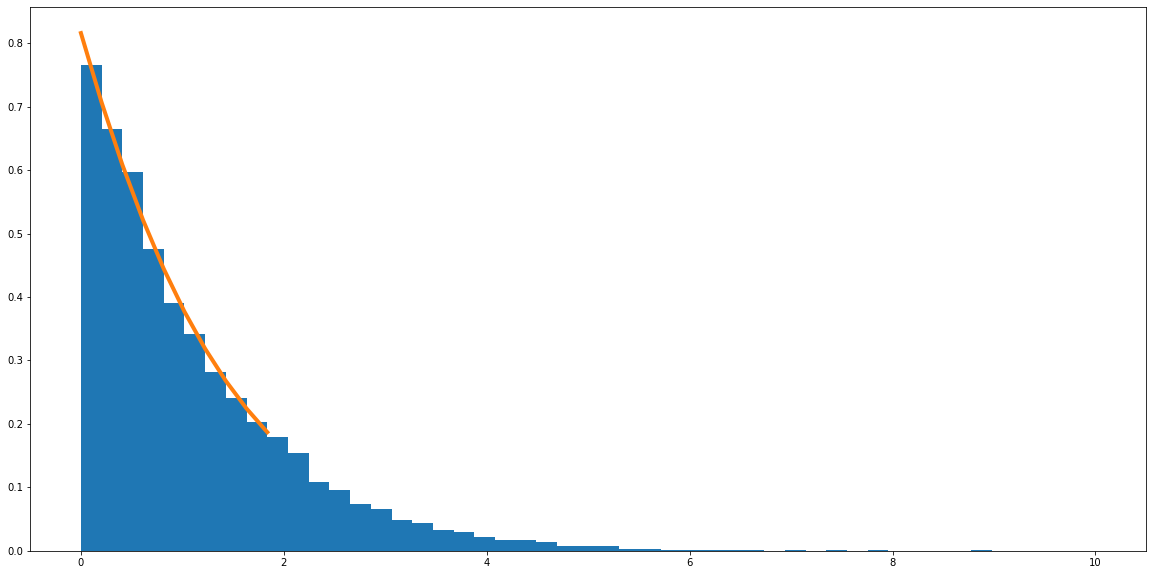

In [8]:
def f(a,n,u): 
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)
N = 10**4
N1 = normale=npr.normal(0,1,N)
N2 = normale=npr.normal(0,1,N)
X = (8* N1**2 * N2**4)**(1/4)
#print(8**(1/4))
plt.figure(figsize = (20,10))
x = linspace(0,10,50)
plt.hist(X, bins = linspace(0, 10, 50), density = True)
plt.plot(x, f(1/4,10**3,x), lw=4)

Cette méthode est donc aussi vérifiée par nos simulations pour $\alpha =1/4$.\
Vérifions alors cela pour tout $\alpha =1/2^m$ avec $m\geq 1$

insérez un entier m =6
1.978456026387951
10000
10000
10000
10000
10000
10000


<ipython-input-102-4f9b56ee7efa>:6: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


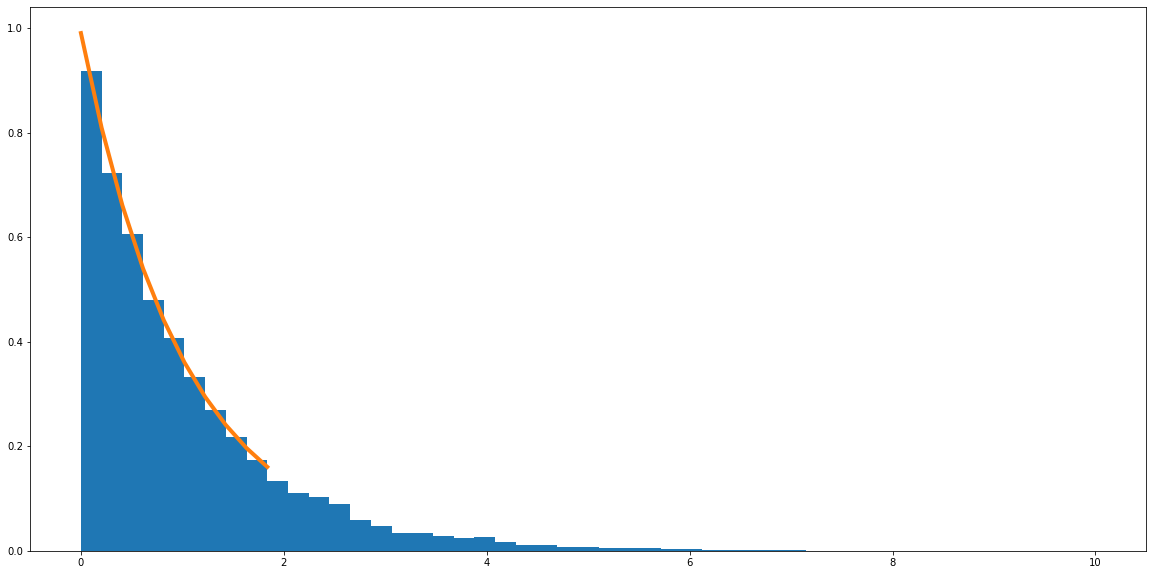

In [102]:
def f(a,n,u): 
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)

m = int(input('insérez un entier m ='))
n = 10**4
sol = 1
X = zeros(n)
print((2**(2**m - 1))**(1/(2**m)))
for i in range(m):
    N = npr.normal(0,1,n)
    print(n)
    for j in range(n):
        X[j] = ( N[j]**(2**(i+1) ))
    sol = X*sol

Y = ((2**(2**m - 1)) * sol)**(1/(2**m))

plt.figure(figsize = (20,10))
x = linspace(0,10,50)
plt.hist(Y, bins = linspace(0, 10, 50), density = True)
plt.plot(x, f(1/(2**m),10**3,x), lw=4)

**Par cette méthode nous savons donc simuler un loi de Mittag-Leffler de paramètre $\alpha$ pour tout $\alpha \leq 1/2$**

Étant donné que l'affichage de notre densité n'est pas optimal nous allons tenter d'estimer la densité via la méthode de Revesz. 

#### On estime la densité pour $\alpha \neq \frac{1}{2}$ avec la méthode de Revesz.

In [2]:
def K(x, s):
    return (1/(s*sqrt(2*pi) ) ) * exp(-(x**2 / (2*s**2)) )

#Noyau gaussien

1.681792830507429


<ipython-input-8-4ced472c9d3d>:9: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


Text(0.5, 1.0, 'Estimation de la densité de la loi de Mittag-Leffler de paramètre 1/4')

<Figure size 1440x720 with 0 Axes>

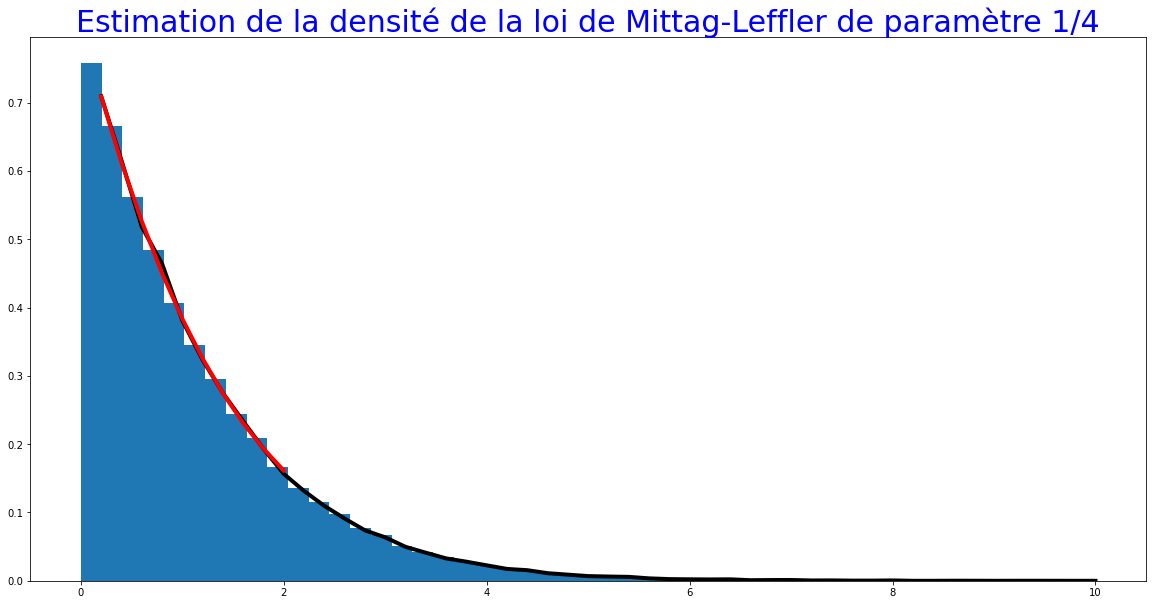

In [8]:
s = 1
n = 10**5

def f(a,n,u): 
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)

alpha_stable = 0.5 #Paramètre de la loi de Mittag-Leffler
N1 = normale=npr.normal(0,1,n)
N2 = normale=npr.normal(0,1,n)
X = (8* N1**2 * N2**4)**(1/4)

alpha = 0.3
h = empty(n)
a = ones(n)

for i in range(n):
    h[i] = (1/(i+1))**alpha
    
def f1_chapeau(x, X, a, h, s, n):
    g = 0
    A = 0
    for l in range(0,n):
        A += a[l]
        g += a[l] * K((x-X[l])/h[l], s) /h[l]
    return g/A


plt.figure(figsize=(20,10))
x=linspace(0.2,10,100)

print(8**(1/4))

plt.figure(figsize = (20,10))
x = linspace(0.2,10,50)
plt.hist(X, bins = linspace(0, 10, 50), density = True)
plt.plot(x, f1_chapeau( x, X, a, h ,s, n), 'black', lw=4)
plt.plot(x, f(1/4,10**3,x),'r', lw=4)
plt.title("Estimation de la densité de la loi de Mittag-Leffler de paramètre 1/4", fontsize = 30, color='blue')


insérez un entier m =6
1.978456026387951
100000
100000
100000
100000
100000
100000


<ipython-input-9-20eabfc8fc53>:9: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


Text(0.5, 1.0, 'Estimation de la densité de la loi de Mittag-Leffler de paramètre $1/2^m$ avec m=6')

<Figure size 1440x720 with 0 Axes>

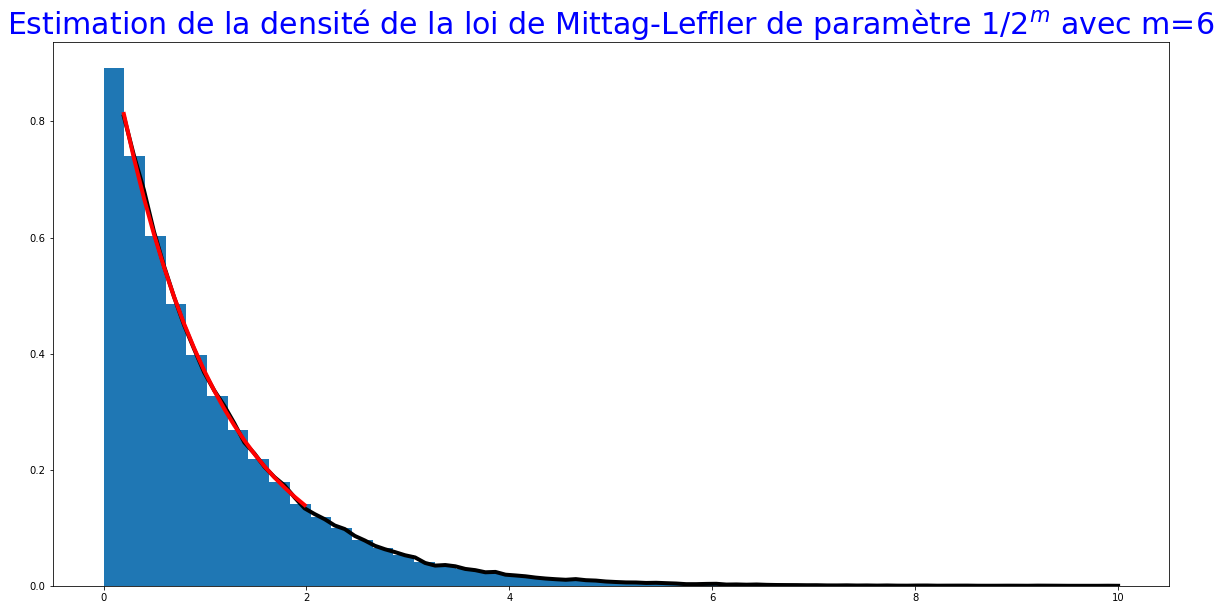

In [9]:
s = 1
n = 10**5

def f(a,n,u): 
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)

m = int(input('insérez un entier m ='))
sol = 1
X = zeros(n)
print((2**(2**m - 1))**(1/(2**m)))
for i in range(m):
    N = npr.normal(0,1,n)
    print(n)
    for j in range(n):
        X[j] = ( N[j]**(2**(i+1) ))
    sol = X*sol

Y = ((2**(2**m - 1)) * sol)**(1/(2**m))

alpha = 0.3
h = empty(n)
a = ones(n)

for i in range(n):
    h[i] = (1/(i+1))**alpha
    
def f1_chapeau(x, X, a, h, s, n):
    g = 0
    A = 0
    for l in range(0,n):
        A += a[l]
        g += a[l] * K((x-X[l])/h[l], s) /h[l]
    return g/A


plt.figure(figsize=(20,10))
x=linspace(0.2,10,100)

#for i in range(2,n-1):
 #   plt.plot(x, f1_chapeau( x, Z[0:i], a[0:i], h ,s, i), 'g', lw=4)
    
plt.figure(figsize=(20,10))
plt.plot(x, f1_chapeau( x, Y, a, h ,s, n), 'black', lw=4)
plt.hist(Y, bins = linspace(0, 10, 50), density = True)
plt.plot(x, f(1/(2**m),10**3,x),'r', lw=4)
plt.title("Estimation de la densité de la loi de Mittag-Leffler de paramètre $1/2^m$ avec m="+str(m) , fontsize = 30, color='blue')


### 2) Cas $\alpha$ rationnel

okay
okay
okay
okay
yep
okay
okay
okay
okay
yep


<ipython-input-111-cc18b33a775b>:14: RuntimeWarning: overflow encountered in power
  som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1)


Text(0.5, 1.0, 'Estimation de la densité de la loi de Mittag-Leffler de paramètre 5/6')

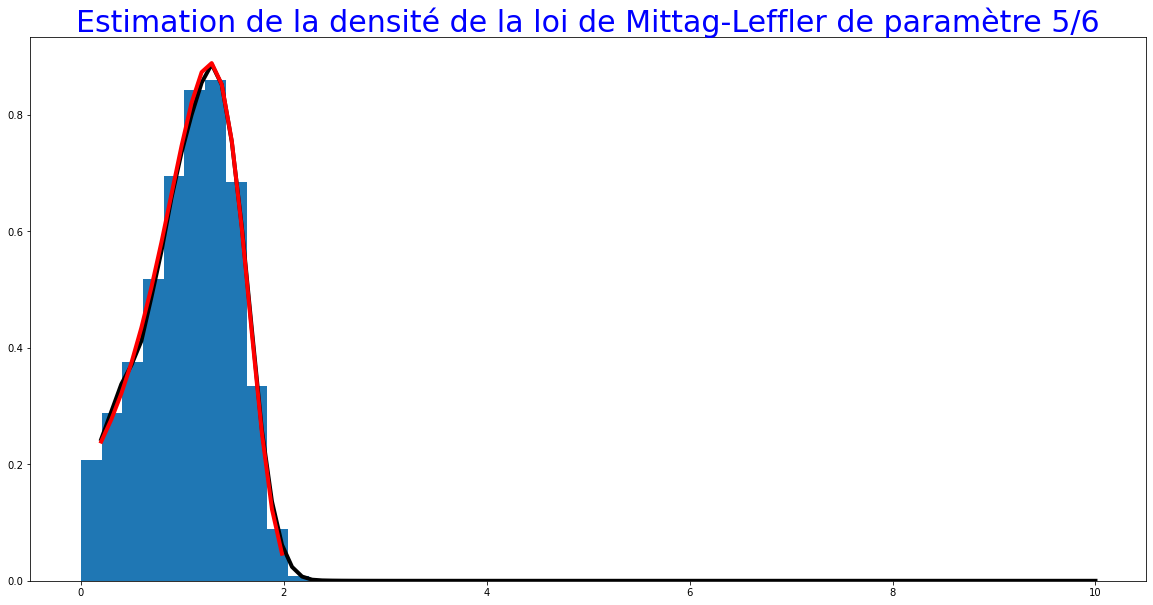

In [111]:
from fractions import Fraction
 
def f(a,n,u): #densité ML
    som = 0
    for i in range(1,n):
        som +=  (-1)**(i-1) * sin(pi * a * i) * mp.gamma(a * i + 1) * u ** (i-1) / mp.gamma(i+1) 
    return som / (pi * a)

def K(x, s): #Noyau gaussien
    return (1/(s*sqrt(2*pi) ) ) * exp(-(x**2 / (2*s**2)) )
 
 
 
def T(n, m, N): #échantillon de ML
    prod = 1
    for i in range(1,m):
        Z_beta = beta=npr.beta(i/n,i*(1/m - 1/n),N)
        print('okay')
        prod = Z_beta*prod
    
    prod2 = 1
    for j in range(m,n):
        Z_gamma = gamma=npr.gamma(j/n,1,N)
        print('yep')
        prod2 = Z_gamma*prod2
        
    return (n / (m**(m/n))) * prod**(1/n) * prod2**(1/n)
 
 
    
def f1_chapeau(x, X, a, h, s, n): #estimateur Revesz
    g = 0
    A = 0
    for l in range(1,n):
        A += a[l]
        g += a[l] * K((x-X[l])/h[l], s) /h[l]
    return g/A
 
N = 10**4
n = 6
m = 5
 
X = T(n,m,N)
h = empty(N)
alpha = 0.3
for i in range(N):
    h[i] = (1/(i+1))**alpha
s = 1
 
a = ones(N)
 
x=linspace(0.2,10,100)
plt.figure(figsize=(20,10))
plt.plot(x, f1_chapeau( x, T(n,m,N), a, h ,s, N), 'black', lw=4)
plt.hist(X, bins = linspace(0, 10, 50), density = True)
plt.plot(x, f(m/n,10**3,x),'r', lw=4)
plt.title("Estimation de la densité de la loi de Mittag-Leffler de paramètre "+str(Fraction(m, n)) , fontsize = 30, color='blue')

## Espérance et variance 

$X \sim \mathcal{ML}(\alpha)$ avec $0 \leq \alpha \leq 1$ alors,
$$E[X] = \frac{1}{\Gamma(1+\alpha)}$$
et 
$$Var(X) = \frac{2}{\Gamma(1+2 \alpha)} - \frac{1}{\Gamma(1+\alpha)^2}$$ 

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

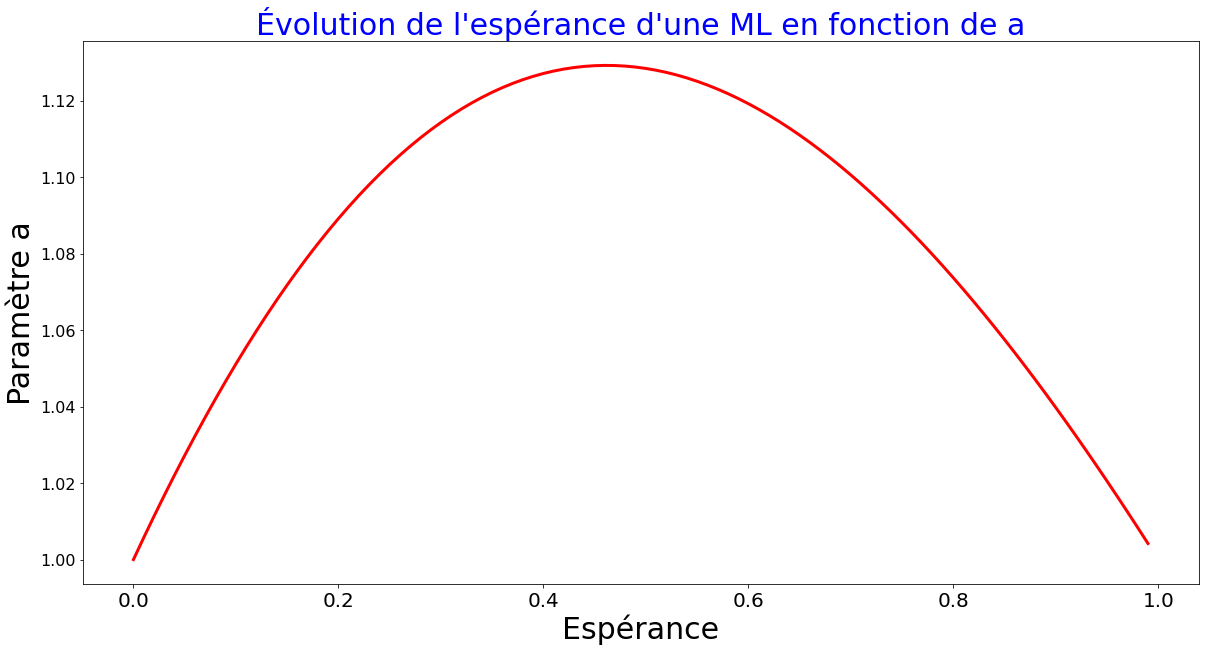

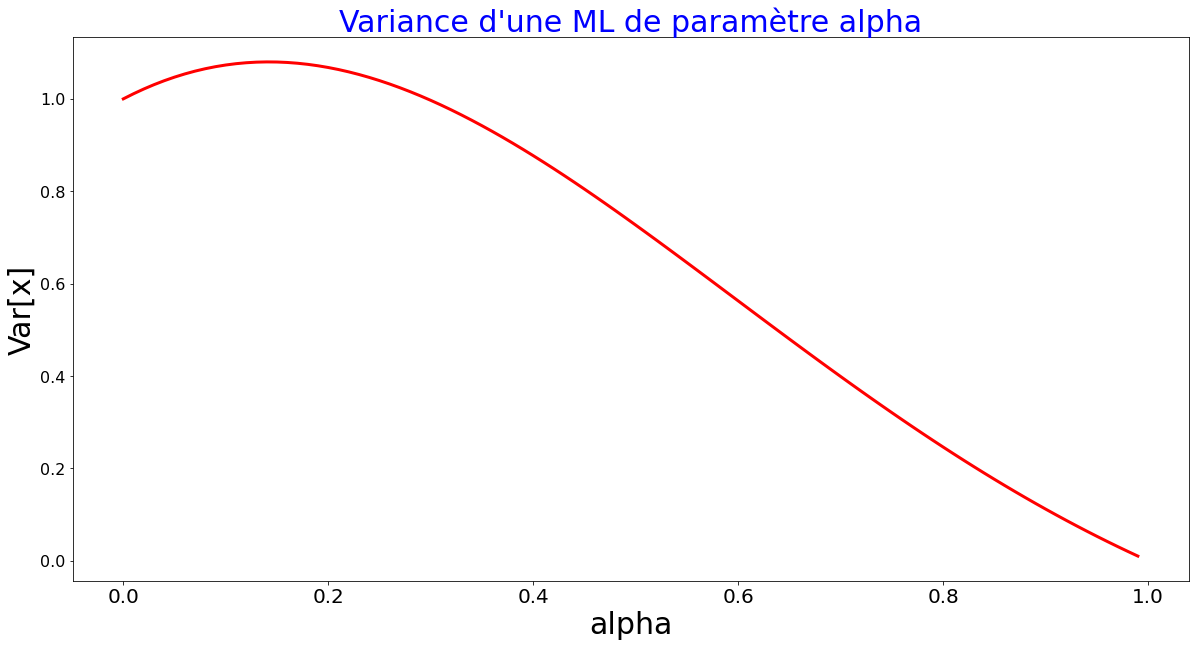

In [63]:
## Espérance
t = []
for i in range(0,100):
    j = i/100
    #print(j)
    t.append( float( (1/mp.gamma(1+j) ) ) )
    
plt.figure(figsize = (20,10))
plt.title("Évolution de l'espérance d'une ML en fonction de a", fontsize = 30, color ='blue')
plt.plot(x, t, 'r', lw = 3)
plt.xlabel("Espérance", size = 30)
plt.ylabel("Paramètre a", size = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
 

## Variance
 
t = []
for i in range(0,100):
    j = i/100
    t.append( float( 2/mp.gamma(1+2*j) - (1/mp.gamma(1+j))**2 ) )

    
x = linspace(0,0.99,100)
plt.figure(figsize = (20,10))
plt.title("Variance d'une ML de paramètre alpha", fontsize = 30, color ='blue')
plt.plot(x, t, 'r', lw = 3)
plt.xlabel("alpha", size = 30)
plt.ylabel("Var[x]", size = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)


# II- Marche aléatoire minimale

À l'instant 0, $X_0=0$.\
À l'instant 1, $X_1 \sim \mathcal{B}\left(s\right)$ \
À l'instant $n+1$, un entier $k$ est choisi aléatoirement et de manière uniforme parmi les instants passés et le pas $X_{n+1}$ est défini par $$
X_{n+1}=\left\{\begin{array}{clc}
\mathcal{B}(p) & \text{si}~~ X_k = 1 \\
\mathcal{B}(q) & \text{si}~~ X_k = 0
\end{array}\right.
$$

La position de la marche aléatoire de l'éléphant avec stop est donnée par  \
$S_0=0$, et pour tout $n \geq 1$
$$S_n = \sum_{k=1}^{n} X_k.$$
Le paramètre fondamental associé à cette marche est $$a = p-q$$
La marche aléatoire minimale est dite diffusive si $a < 1/2$, critique si $a = 1/2$ et superdiffusive si $a > 1/2$.

Le **centre de masse** d’une marche aléatoire à un instant $i$ (ou pour $i$ pas) se définit comme la moyenne empirique des $i$ positions prises par la marche aléatoire. \
On définit le centre de masse $\left(G_n\right)$ de la marche aléatoire $\left(S_n\right)$ par \
$G_0=0$, et pour tout $n \geq 1$ par 
$$G_n = \frac {1}{n} \sum_{k=1}^{n} S_k$$

## 1- Simulation de la marche aléatoire minimale

In [55]:
def bernoulli(p) :
    nb = random()
    if nb <= p : r = 1
    else : r = 0
    return r

     

def simulate_minimal_random_walk(N,s,p,q) :
    steps_Xn = []
    position_Sn = []
    Gn = []
    lim = []   #lim est une liste des valeurs de S_n/n utile pour les convergences suivantes
    lim2 = []  #lim2 est une liste des valeurs de G_n/n utile pour les convergences suivantes
    indices = [*range(0,N,1)]
    steps_Xn.append([0])
    position_Sn.append(0)
    Gn.append(0)
    lim.append(0)
    lim2.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = bernoulli(s)
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            Gn.append(mean(position_Sn))
            lim.append(new_step)
            lim2.append((mean(position_Sn)))
        else : 
            k=randint(1,n-1)
            if steps_Xn[k] == 1 :
                new_step = bernoulli(p)
            else :
                new_step = bernoulli(q)
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            Gn.append(mean(position_Sn))
            lim.append(position_Sn[n]/n)
            lim2.append(Gn[n]/n)
    return indices, steps_Xn, position_Sn, Gn, lim, lim2

def plotting_MRW(indices, position_Sn, Gn) : 
    fig = plt.figure(figsize = (20,10))
    plt.plot(indices,position_Sn, 'blue', lw = 2)
    plt.plot(indices, Gn, 'red', lw=1)
    plt.title("Simulation la marche aléatoire minimale et de son centre de masse(pour p="+ str(p) + " et q="+ str(q)+')', fontsize = 30, color= "blue")

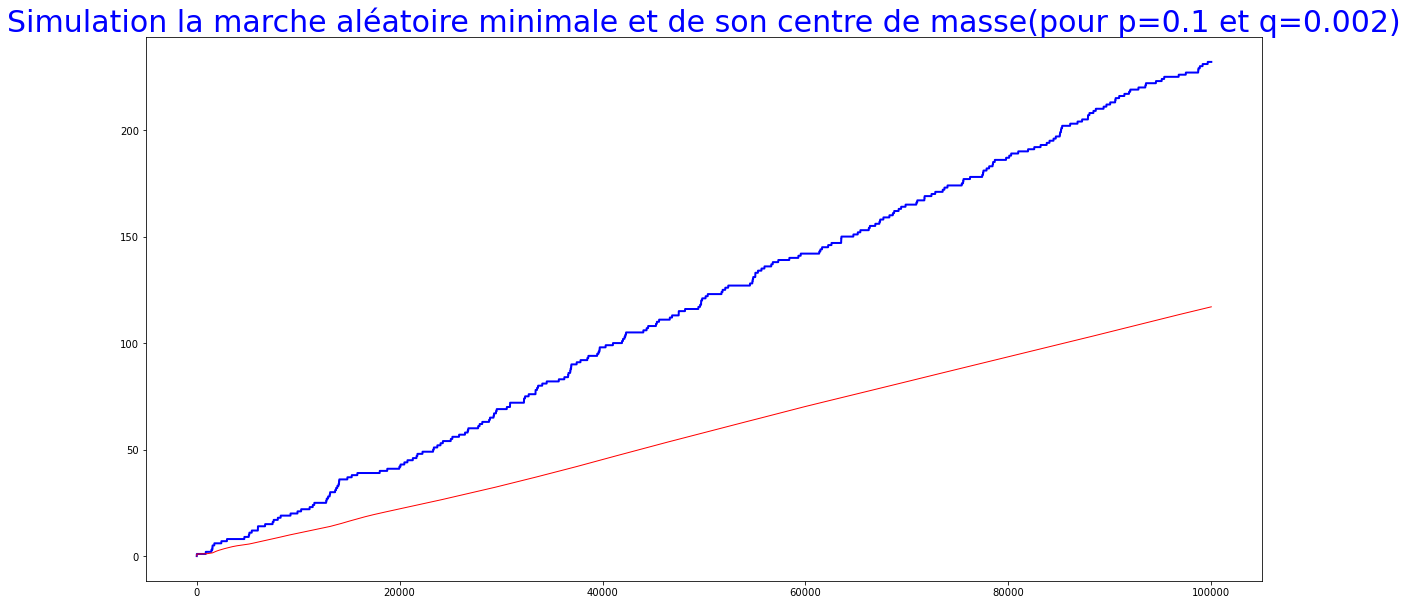

In [11]:
N = 10**5
s = 1 
p = 0.1
q = 0.002
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
plotting_MRW(indices, position_Sn, Gn)

## 2- Cas diffusif ($a<1/2$)

### 2.1. Convergence presque sûre

$$\frac{S_n}{n}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\frac{q}{1-a}$$    si $q \in [0;1)$ et avec $a = p - q$

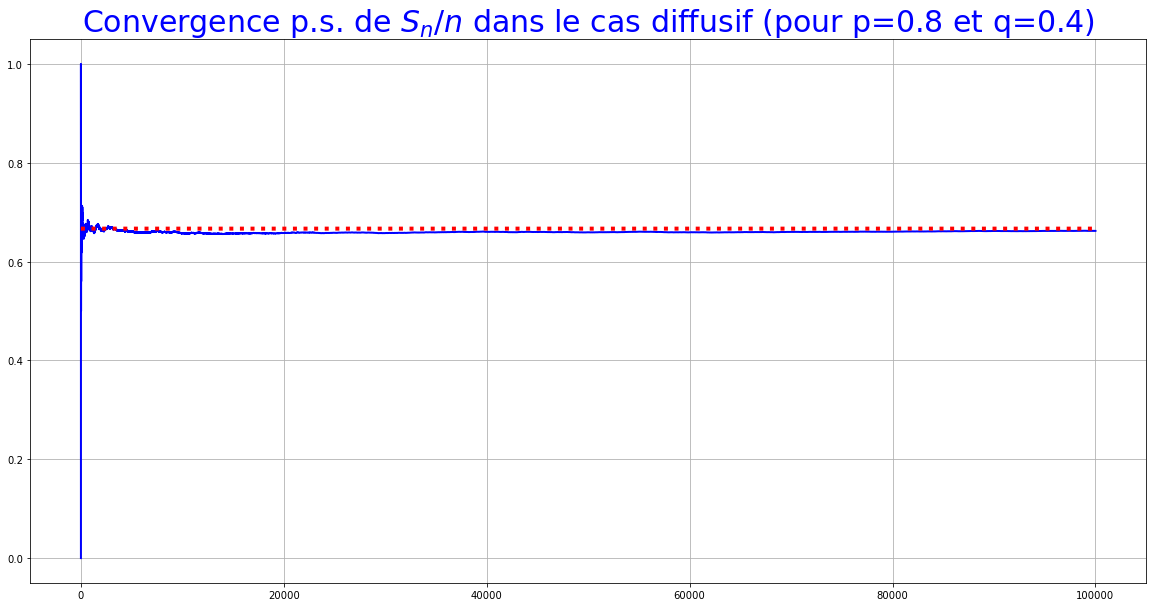

In [66]:
def plotting_convergence_ps_diffusif(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2)
    plt.title('Convergence p.s. de $S_n/n$ dans le cas diffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    l=[]
    for i in range(0,N) : 
        l.append(q/(1-(p-q)))
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()
    
N = 10**5
s = 1
p = 0.8
q = 0.4
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
plotting_convergence_ps_diffusif(N, indices, lim)

### 2.2. Normalité asymptotique 

$$\frac{S_n - \frac{q}{1-a}n}{\sqrt{n}}\underset{n \to +\infty}{\overset{\mathcal{L}}{\longrightarrow}} \mathcal{N} \left(0, \frac{q\left(1-p\right)}{\left(1-a\right)^2\left(1-2a\right)}  \right)$$

Que l'on peut réécrire : 
$$ \sqrt{n} \left(\frac{S_n}{n} - \frac{q}{1-a} \right) \underset{n \to +\infty}{\overset{\mathcal{L}}{\longrightarrow}} \mathcal{N} \left(0, \frac{q\left(1-p\right)}{\left(1-a\right)^2\left(1-2a\right)}  \right)$$

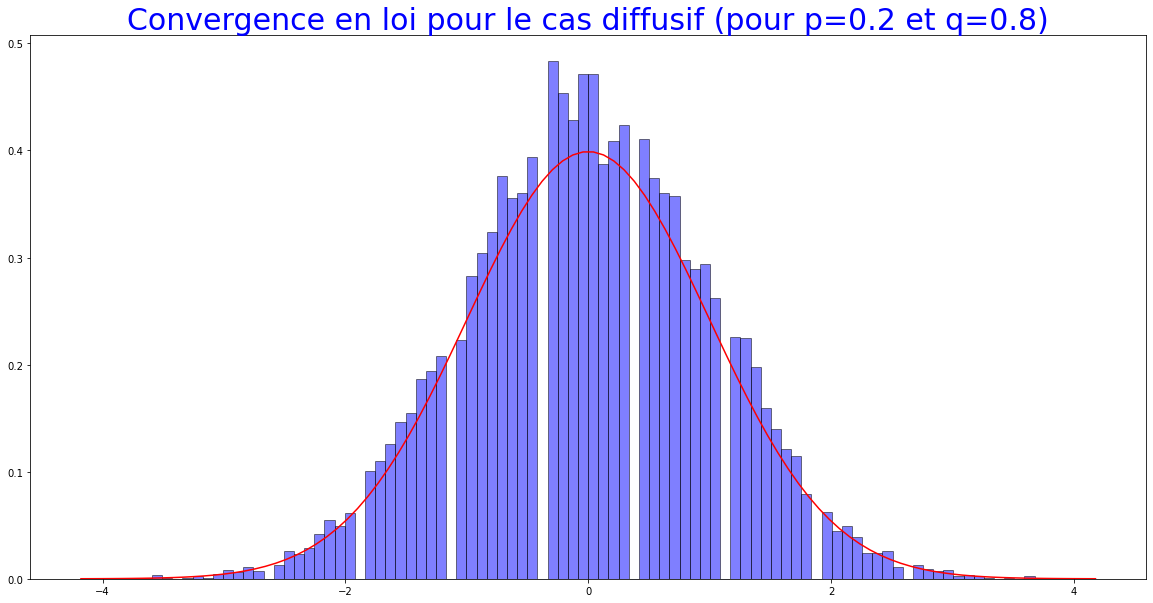

In [68]:
def asymptotic_normality_diffusif(repetition, N, p, q):

    a = p - q
    list_conv_loi = []
    
    for i in range(repetition):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
        lim = lim[N-1]
        cv_loi = (sqrt(N)*(lim-(q/(1-a))))/(sqrt((q*(1-p))/((1-a)**2 *(1-2*a))))
        list_conv_loi.append(cv_loi)

   
    plt.figure(figsize = (20,10))
    plt.title('Convergence en loi pour le cas diffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_conv_loi)))
    plt.hist(list_conv_loi, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    
    x = linspace(min(list_conv_loi), max(list_conv_loi), 100)
    y = scipy.stats.norm.pdf(x, 0, 1)
    plt.plot(x, y,'r')
    plt.show()
    
N = 10**3
repetition = 10**4
s = 1
p = 0.2
q = 0.8
asymptotic_normality_diffusif(repetition, N, p, q)

### 2.3. Comportement asymptotique du centre de masse 

#### 2.3.1. Convergence presque sûre 

$$\frac{G_n}{n}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\frac{q}{2\left(1-a\right)}$$    

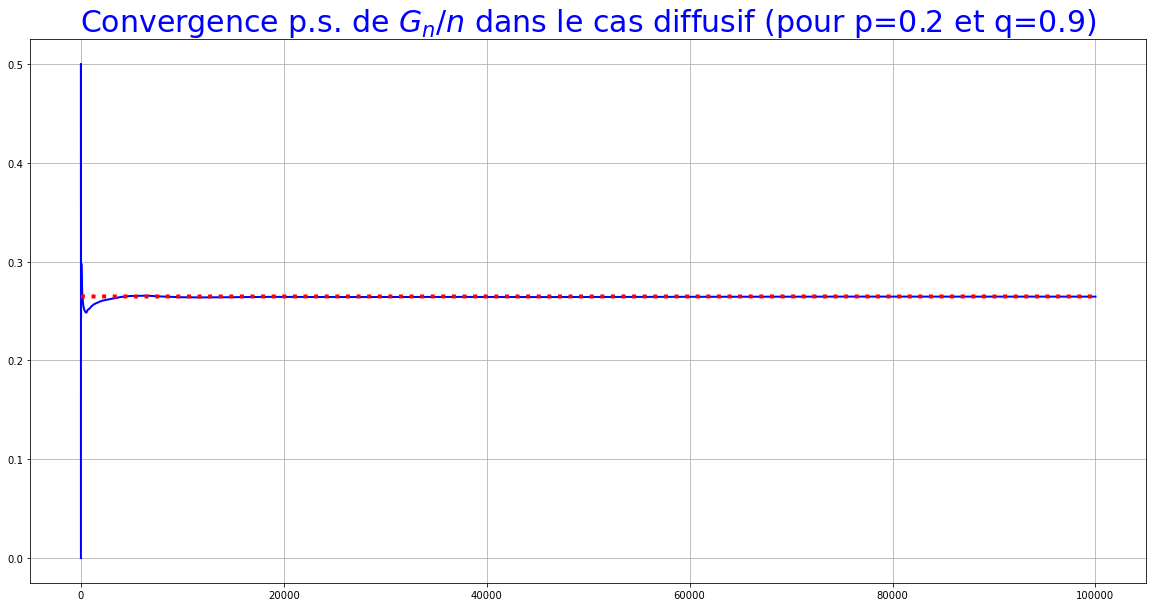

In [74]:
def plotting_convergence_ps_centre_de_masse_diffusif(N, indices, lim2) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim2, 'blue',lw=2)
    plt.title('Convergence p.s. de $G_n/n$ dans le cas diffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    l=[]
    for i in range(0,N) : 
        l.append(q/(2*(1-(p-q))))
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()

    
N = 10**5
s = 1
p = 0.2
q = 0.9
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
plotting_convergence_ps_centre_de_masse_diffusif(N, indices, lim2)

#### 2.3.2. Normalité asymptotique

$$ \sqrt{n} \left(\frac{G_n}{n} - \frac{q}{2\left(1-a\right)} \right) \underset{n \to +\infty}{\overset{\mathcal{L}}{\longrightarrow}} \mathcal{N} \left(0, \frac{2\sigma^2}{3\left(1-2a\right)\left(2-a\right)}  \right)$$
avec $\sigma^2 = \frac{q\left(1-p\right)}{\left(1-a\right)^2}$

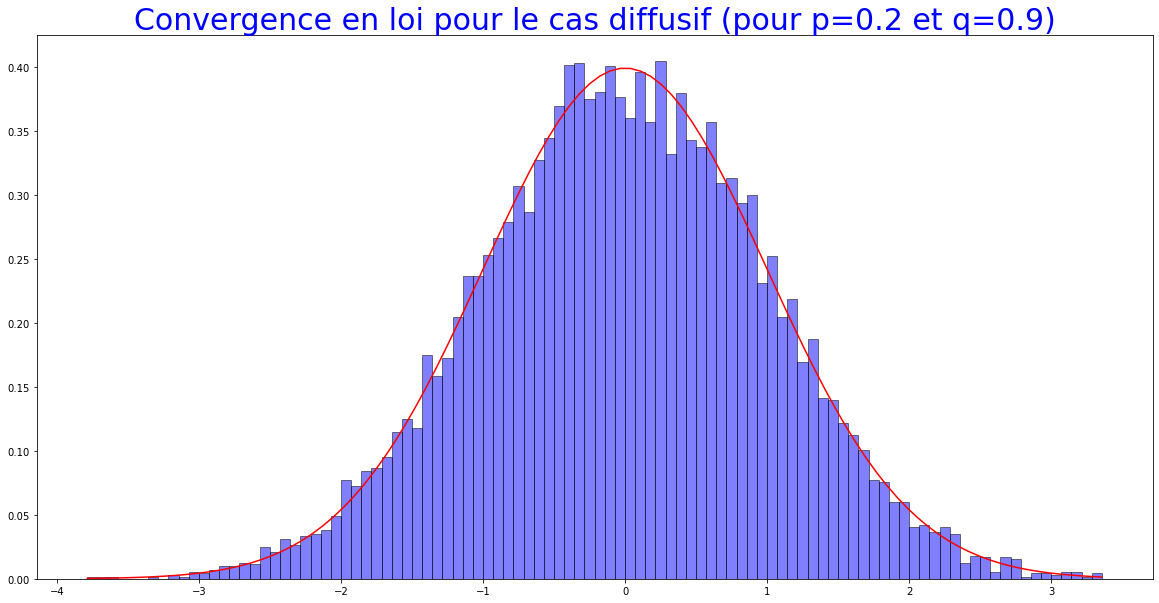

In [61]:
def asymptotic_normality_centre_de_masse_diffusif(repetition, N, p, q):

    a = p - q
    sigma2 = (q*(1-p))/((1-a)**2)
    list_conv_loi = []
    
    for i in range(repetition):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
        lim2 = lim2[N-1]
        cv_loi = (sqrt(N)*(lim2-(q/(2*(1-a)))))/(sqrt((2*sigma2)/(3*(1-2*a)*(2-a))))
        list_conv_loi.append(cv_loi)

   
    plt.figure(figsize = (20,10))
    plt.title('Convergence en loi pour le cas diffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_conv_loi)))
    plt.hist(list_conv_loi, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    
    x = linspace(min(list_conv_loi), max(list_conv_loi), 100)
    y = scipy.stats.norm.pdf(x, 0, 1)
    plt.plot(x, y,'r')
    plt.show()
    
N = 10**3
repetition = 10**4
s = 1
p = 0.2
q = 0.9
asymptotic_normality_centre_de_masse_diffusif(repetition, N, p, q)

## 3- Cas critique ($a=1/2$)

### 3.1. Convergence presque sûre

$$\frac{S_n}{n}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\frac{q}{1-a}$$    si $q \in [0;1)$ et avec $a = p - q$

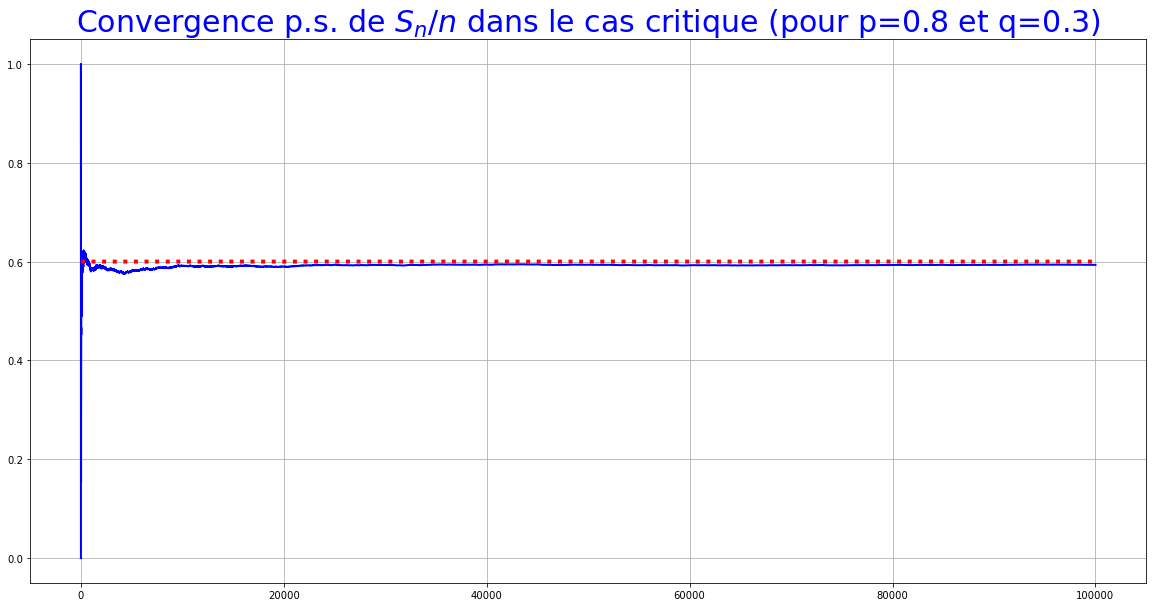

In [70]:
def plotting_convergence_ps_critique(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2)
    plt.title('Convergence p.s. de $S_n/n$ dans le cas critique (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    l=[]
    for i in range(0,N) : 
        l.append(q/(1-(p-q)))
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()
    
N = 10**5
s = 1
p = 0.8
q = 0.3
indices, steps_Xn, position_Sn, Gn, lim, lim2= simulate_minimal_random_walk(N,s,p,q)
plotting_convergence_ps_critique(N, indices, lim)

### 3.2. Normalité asymptotique

$$ \frac{S_n - 2qn}{\sqrt{n log(n)}} \underset{n \to +\infty}{\overset{\mathcal{L}} {\longrightarrow}} \mathcal{N} \left(0, 4q\left(1-p\right)\right)$$
C'est à dire : 
$$\sqrt{n} \left( \frac{S_n}{n} \times \frac{1}{\sqrt{log (n)}} - \frac{2q}{\sqrt{log (n)}}\right) \underset{n \to +\infty}{\overset{\mathcal{L}} {\longrightarrow}} \mathcal{N} \left(0, 4q\left(1-p\right)\right)$$

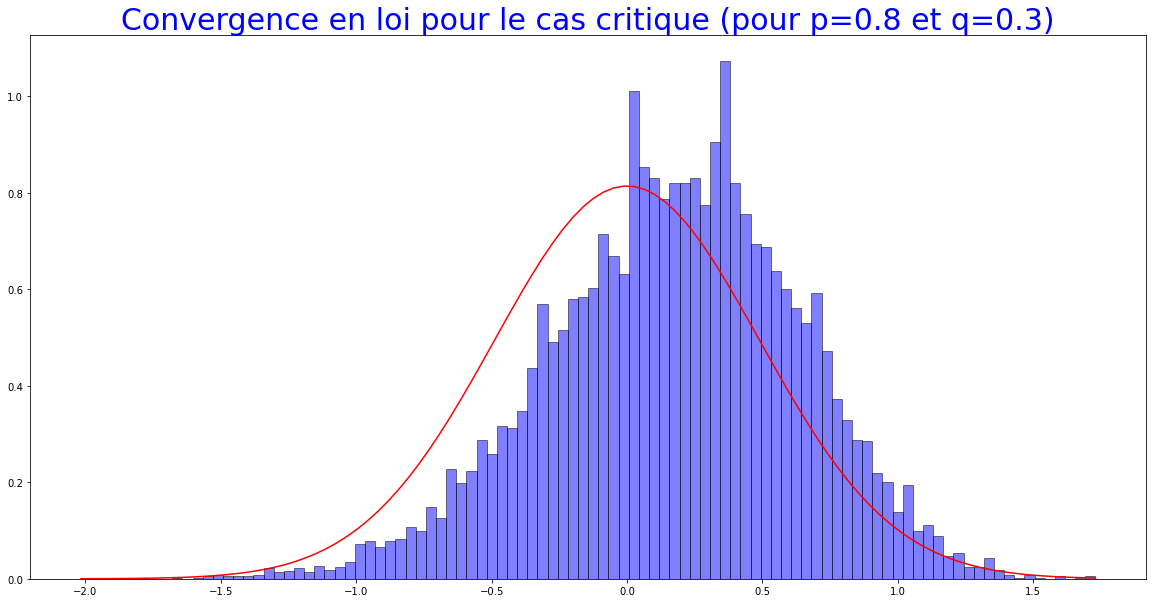

In [71]:
def asymptotic_normality_critique(repetition, N, p, q):

    a = p - q
    list_conv_loi = []
    
    for i in range(repetition):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
        lim = lim[N-1]
        cv_loi = (sqrt(N)*(lim*(1/sqrt(log(N)))-(2*q/(sqrt(log(N)))))) 
        list_conv_loi.append(cv_loi)

   
    plt.figure(figsize = (20,10))
    plt.title('Convergence en loi pour le cas critique (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_conv_loi)))
    plt.hist(list_conv_loi, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    
    
    x = linspace(min(list_conv_loi), max(list_conv_loi), 100)
    y = scipy.stats.norm.pdf(x, 0, sqrt(4*q*(1-p)))
    plt.plot(x, y,'r')
    plt.show()
    
N = 10**3
repetition = 10**4
s = 1
p = 0.8
q = 0.3
asymptotic_normality_critique(repetition, N, p, q)

### 3.3. Comportement asymptotique du centre de masse 

#### 3.3.1. Convergence presque sûre 

$$\frac{G_n}{n}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}q$$    

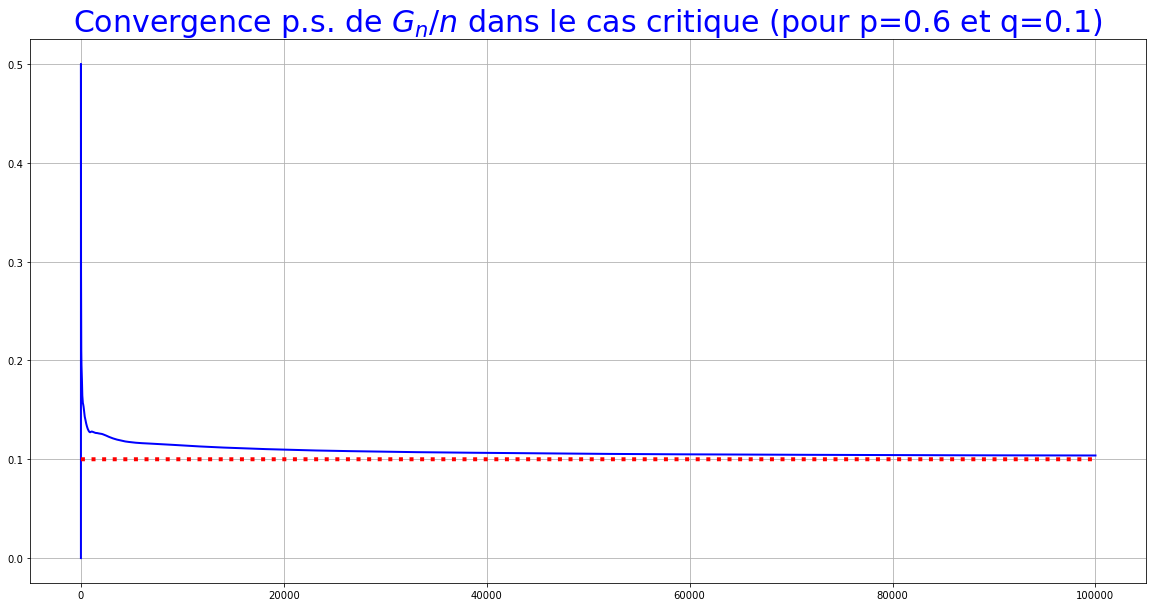

In [75]:
def plotting_convergence_ps_centre_de_masse_critique(N, indices, lim2) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim2, 'blue',lw=2)
    plt.title('Convergence p.s. de $G_n/n$ dans le cas critique (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    l=[]
    for i in range(0,N) : 
        l.append(q)
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()
    
N = 10**5
s = 1
p = 0.6
q = 0.1
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
plotting_convergence_ps_centre_de_masse_critique(N, indices, lim2)

#### 3.3.2. Normalité asymptotique

$$ \sqrt{\frac{n}{logn}} \left(\frac{G_n}{n} - q \right) \underset{n \to +\infty}{\overset{\mathcal{L}}{\longrightarrow}} \mathcal{N} \left(0, \frac{16q\left(1-p\right)}{9}  \right)$$

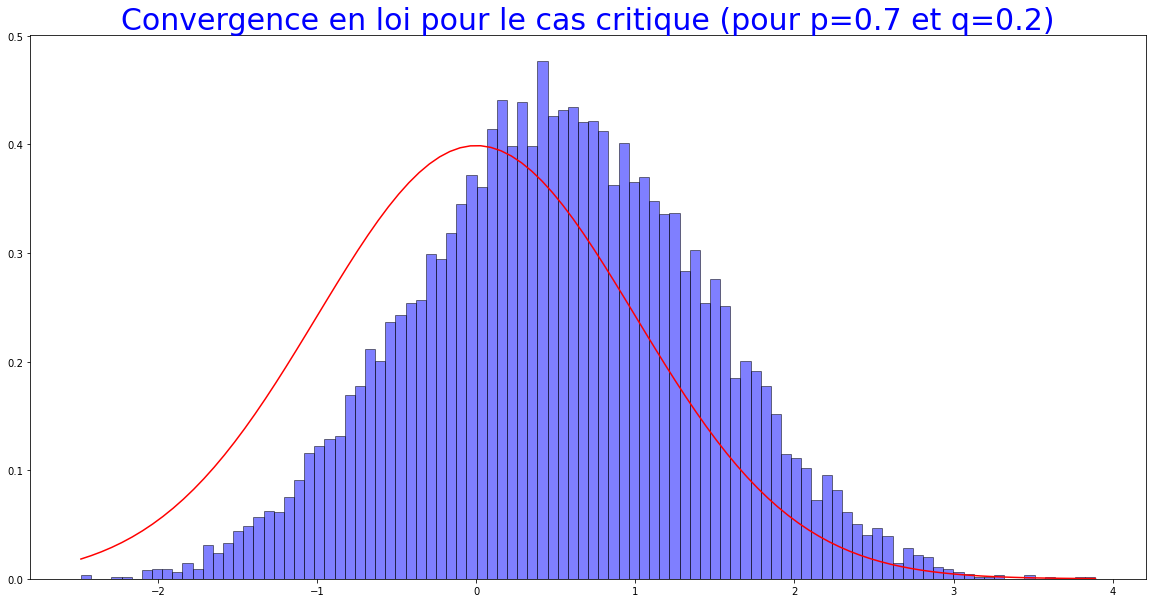

In [77]:
def asymptotic_normality_centre_de_masse_critique(repetition, N, p, q):

    a = p - q
    list_conv_loi = []
    
    for i in range(repetition):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk(N,s,p,q)
        limite = lim2[N-1]
        cv_loi = (sqrt(N)/sqrt(log(N)))*(limite-q)/(sqrt(16*q*(1-p)/9))
        list_conv_loi.append(cv_loi)

   
    plt.figure(figsize = (20,10))
    plt.title('Convergence en loi pour le cas critique (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_conv_loi)))
    plt.hist(list_conv_loi, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    
    x = linspace(min(list_conv_loi), max(list_conv_loi), 100)
    y = scipy.stats.norm.pdf(x, 0, 1)
    plt.plot(x, y,'r')
    plt.show()
    
N = 10**3
repetition = 10**4
s = 1
p = 0.7
q = 0.2
asymptotic_normality_centre_de_masse_critique(repetition, N, p, q)

## 4- Cas super-diffusif ($a>1/2$)

### 4.1. Convergence presque sûre

- Si $q=0$ et $p>1/2$ $$\frac{S_n}{n^p}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}} L$$    où $L$ suit une loi de Mittag-Leffler de paramètre $p$. 

In [127]:
def simulate_minimal_random_walk2(N,s,p,q) :
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    Gn = []
    lim = []
    lim2 = []
    steps_Xn.append(0)
    position_Sn.append(0)
    Gn.append(0)
    lim.append(0)
    lim2.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = 1
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            Gn.append(mean(position_Sn))
            lim.append(new_step)
            lim2.append(mean(position_Sn))
        else : 
            k=randint(1,n-1)
            if steps_Xn[k] == 1 :
                new_step = bernoulli(p)
            else :
                new_step = bernoulli(q)
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            Gn.append(mean(position_Sn))
            lim.append(position_Sn[n]/n**p)
            lim2.append(Gn[n]/n**p)
    return indices, steps_Xn, position_Sn, Gn, lim, lim2

def plotting_convergence_ps_superdiffusif(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2)
    plt.title('Convergence p.s. de $S_n/n^p$ (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    plt.show()
    
def plotting_hist_cv_ps(N, rep,s,p,q,X,a,h): 
    list_lim = []
    list_lim.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk2(N,s,p,q)
        limite = lim[N-1]
        list_lim.append(limite)
        
    plt.figure(figsize=(20,10))
    plt.title('Convergence en loi pour L' , fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim)))
    plt.hist(list_lim, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    x = linspace(min(list_lim), max(list_lim), 100)
    y = f1_chapeau(x, X, a, h, s, N)
    plt.plot(x, y,'r')

okay
okay
okay
okay
yep


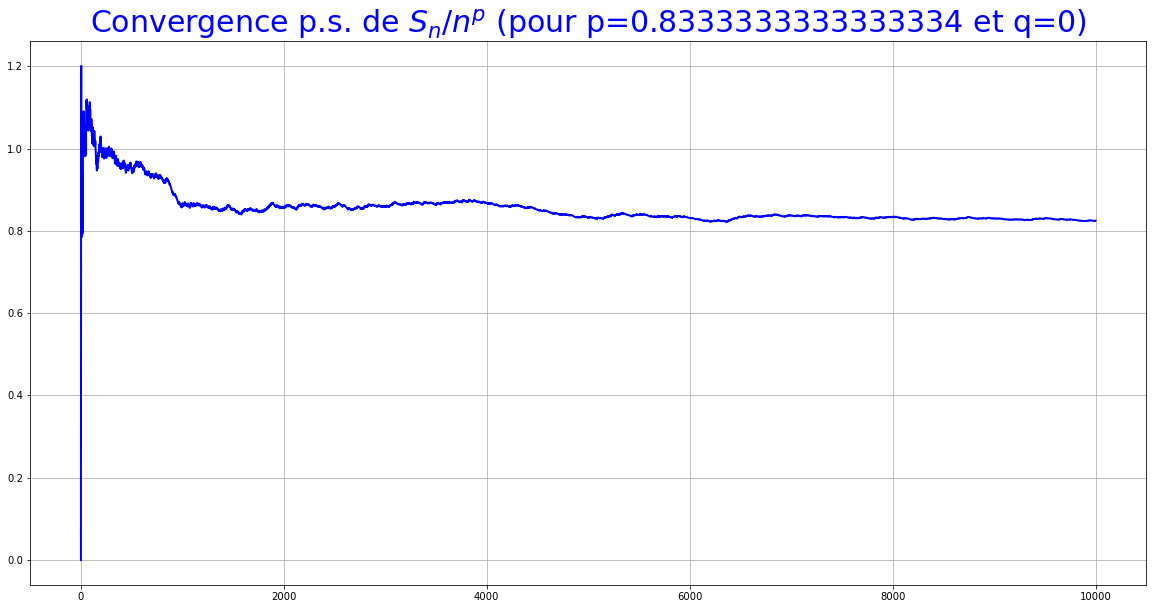

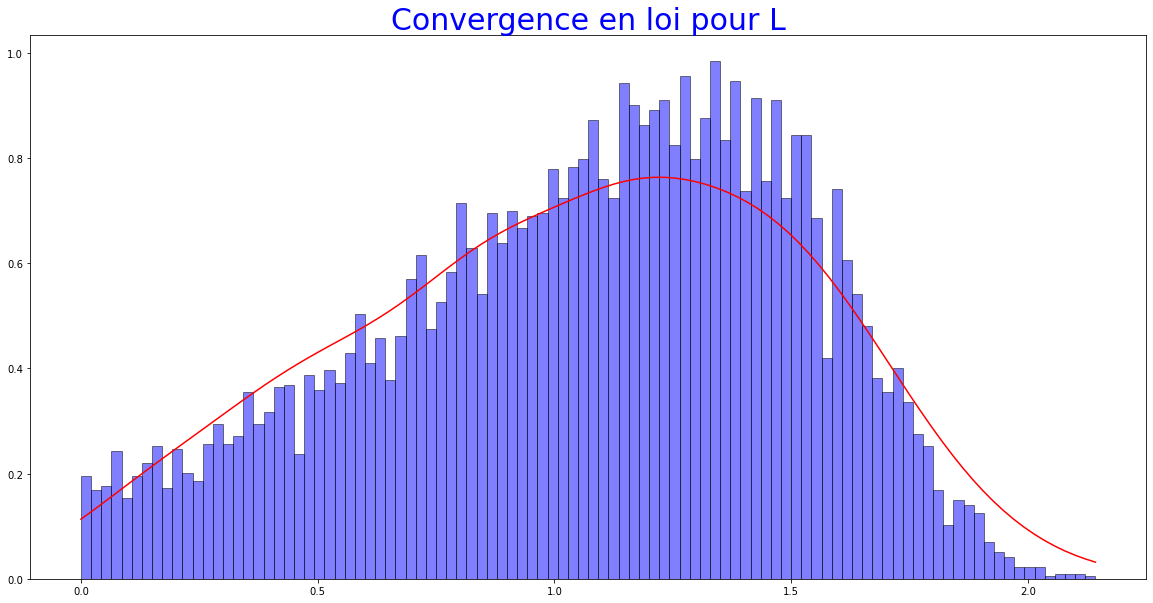

In [81]:
N = 10**4
n = 6
m = 5
p = m/n
q = 0
 
X = T(n,m,N)
h = empty(N)
alpha = 0.3
for i in range(N):
    h[i] = (1/(i+1))**alpha
s = 1
 
a = ones(N)
 
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk2(N,s,p,q)
plotting_convergence_ps_superdiffusif(N, indices, lim)
plotting_hist_cv_ps(10**3, 10**4,s,p,q,X,a,h)

okay
okay
yep
yep


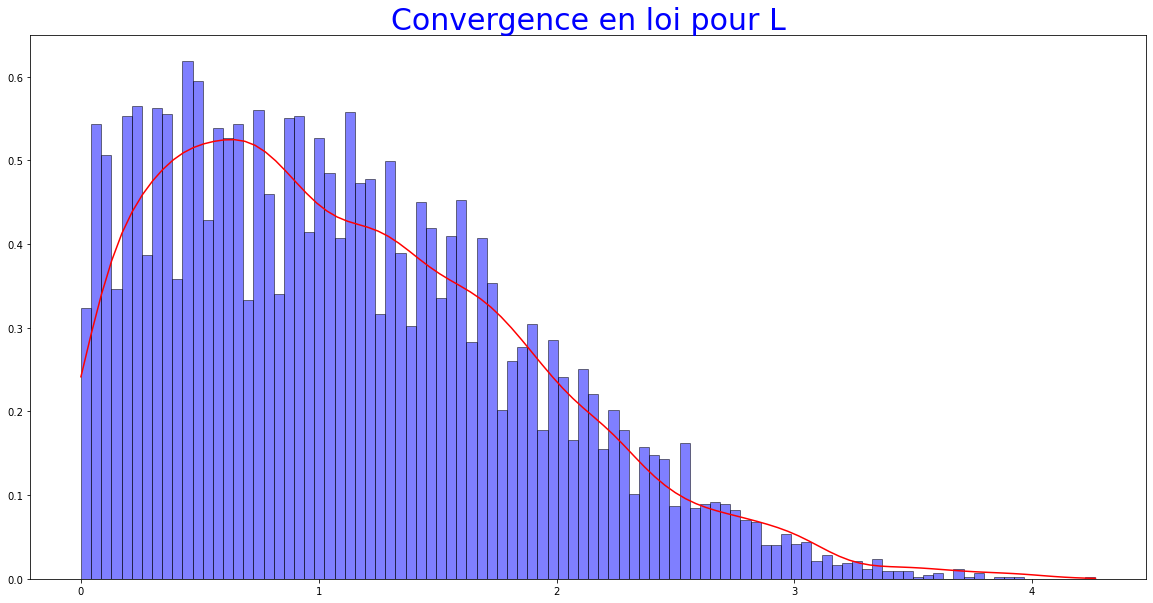

In [92]:
N = 10**4
n = 5
m = 3
p = m/n
q = 0
 
X = T(n,m,N)
h = empty(N)
alpha = 0.3
for i in range(N):
    h[i] = (1/(i+1))**alpha
s = 1
 
a = ones(N)
 
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk2(N,s,p,q)
#plotting_convergence_ps_superdiffusif(N, indices, lim)
plotting_hist_cv_ps(10**3, 10**4,s,p,q,X,a,h)

Le premier graphique ci-dessus indique bien une convergence. \
Or, il s’agit d’une convergence vers une variable aléatoire donc l’affichage en histogramme est nécessaire pour vérifier qu’il s’agit d’une distribution de Mittag-Leffler de paramètre $p$. (cf 2eme graphique)

- Si on enlève la condition $q=0$ on a 
$$n^{1-a}\left(\frac{S_n}{n}-\frac{q}{1-a}\right)\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}} L$$
avec $L$ une variable aléatoire non dégénérée

In [150]:
def simulate_minimal_random_walk3(N,s,p,q) :
    a = p-q
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    lim3 = []
    steps_Xn.append(0)
    position_Sn.append(0)
    lim3.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = 1
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            lim3.append(new_step-(q/(1-a)))
        else : 
            k=randint(1,n-1)
            if steps_Xn[k] == 1 :
                new_step = bernoulli(p)
            else :
                new_step = bernoulli(q)
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            lim3.append((n**(1-a))*((position_Sn[n]/n) - (q/(1-a))))
    return indices, steps_Xn, position_Sn, lim3

def plotting_convergence_ps_superdiffusif_q_non_nul(N, indices, lim3) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim3, 'blue',lw=2)
    plt.title('Convergence p.s. dans le cas superdiffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")

def plotting_hist_cv_ps_q_non_nul(N, rep,s,p,q): 
    list_lim = []
    list_lim.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, lim3 = simulate_minimal_random_walk3(N,s,p,q)
        limite = lim3[N-1]
        list_lim.append(limite)
        
    plt.figure(figsize=(20,10))
    plt.title('Histogramme de la distribution de L (pour p=' +str(p) + 'et q=' +str(q) + ')' , fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim)))
    plt.hist(list_lim, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    #plt.xlabel( size = 30) 
    #plt.ylabel( size = 30) 
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=16)

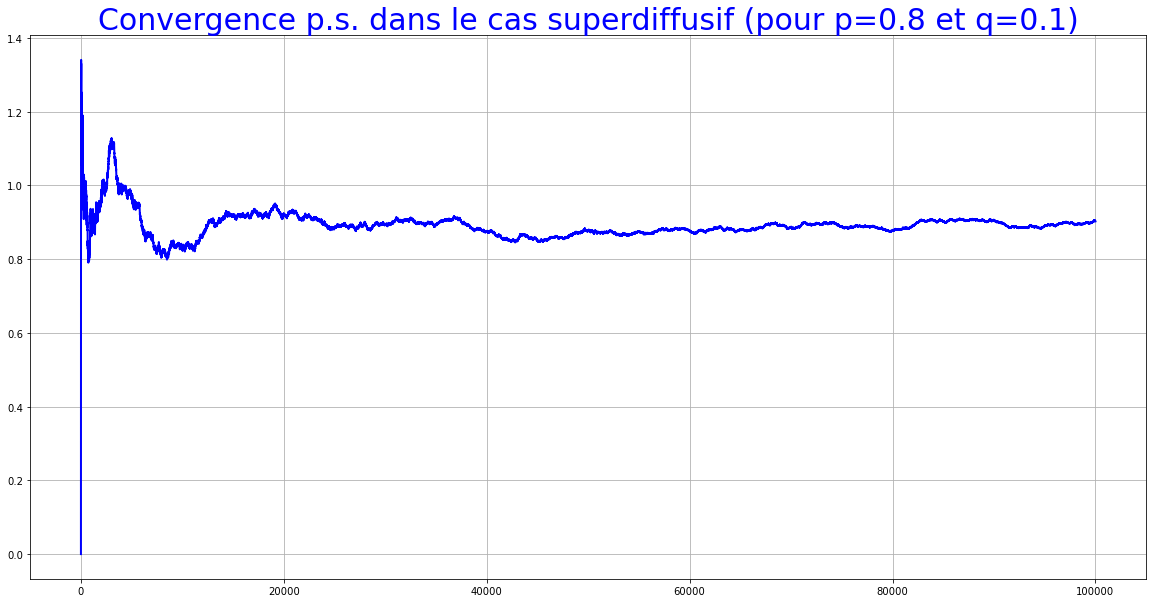

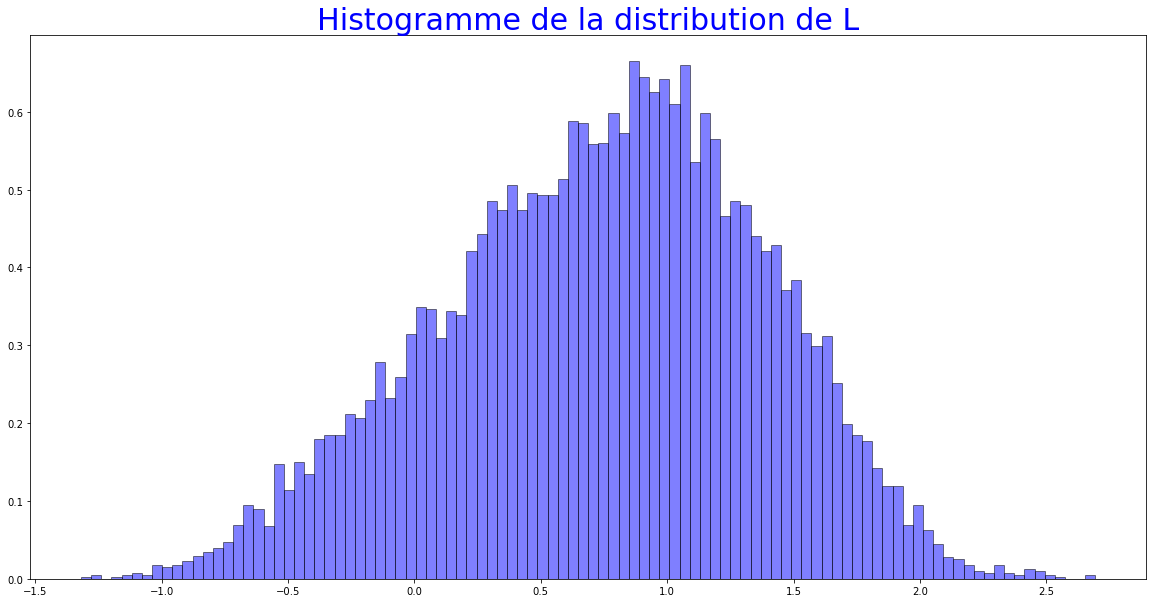

In [83]:
def simulate_minimal_random_walk3(N,s,p,q) :
    a = p-q
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    lim3 = []
    steps_Xn.append(0)
    position_Sn.append(0)
    lim3.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = 1
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            lim3.append(new_step-(q/(1-a)))
        else : 
            k=randint(1,n-1)
            if steps_Xn[k] == 1 :
                new_step = bernoulli(p)
            else :
                new_step = bernoulli(q)
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            lim3.append((n**(1-a))*((position_Sn[n]/n) - (q/(1-a))))
    return indices, steps_Xn, position_Sn, lim3

def plotting_convergence_ps_superdiffusif_q_non_nul(N, indices, lim3) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim3, 'blue',lw=2)
    plt.title('Convergence p.s. dans le cas superdiffusif (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")

def plotting_hist_cv_ps_q_non_nul(N, rep,s,p,q): 
    list_lim = []
    list_lim.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, lim3 = simulate_minimal_random_walk3(N,s,p,q)
        limite = lim3[N-1]
        list_lim.append(limite)
        
    plt.figure(figsize=(20,10))
    plt.title('Histogramme de la distribution de L (pour p=' +str(p) + 'et q=' +str(q) + ')' , fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim)))
    plt.hist(list_lim, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    
N = 10**5
s = 2/3
p = 0.8
q = 0.1
indices, steps_Xn, position_Sn, lim3 = simulate_minimal_random_walk3(N,s,p,q)
plotting_convergence_ps_superdiffusif_q_non_nul(N, indices, lim3)
rep = 10**4
plotting_hist_cv_ps_q_non_nul(10**3, rep,s,p,q)


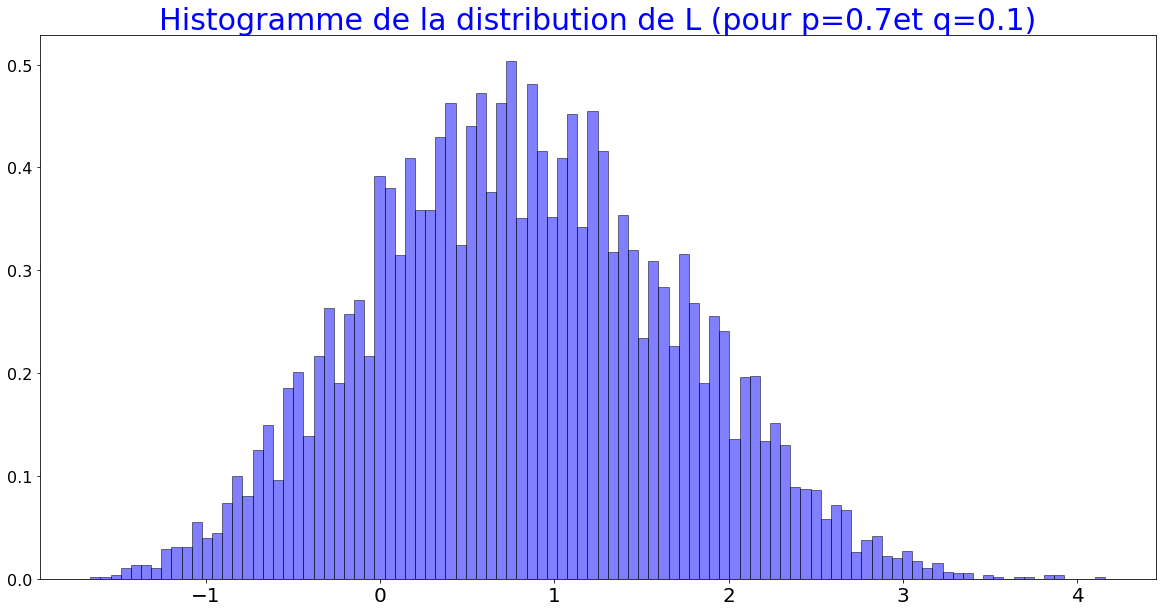

In [153]:
N = 10**5
s = 2/3
p = 0.7
q = 0.1
indices, steps_Xn, position_Sn, lim3 = simulate_minimal_random_walk3(N,s,p,q)
#plotting_convergence_ps_superdiffusif_q_non_nul(N, indices, lim3)
rep = 10**4
plotting_hist_cv_ps_q_non_nul(10**3, rep,s,p,q)

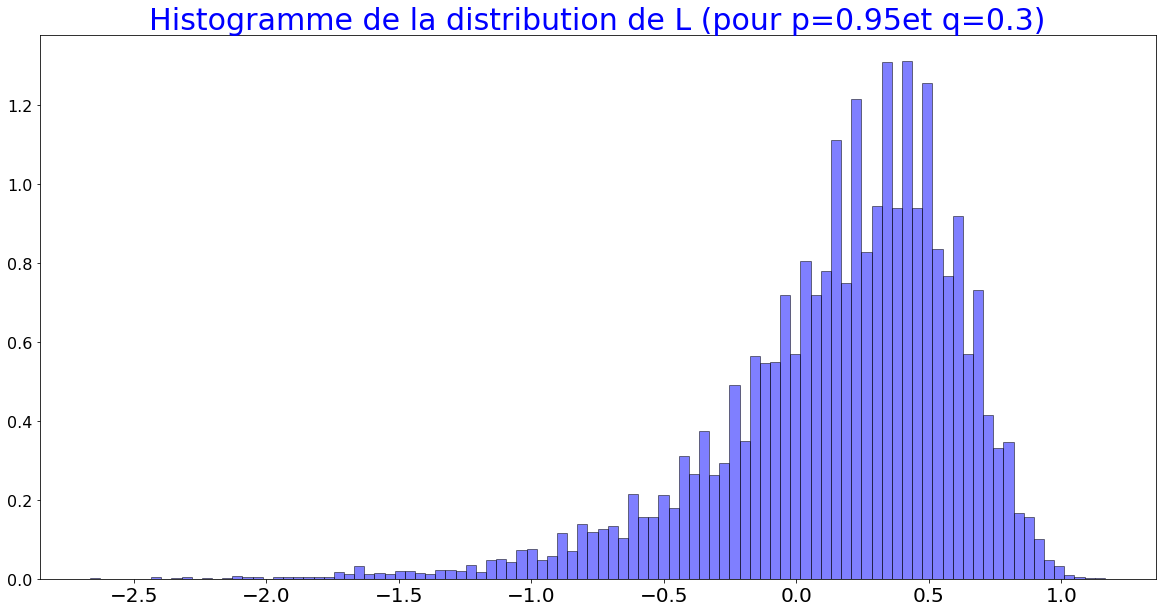

In [152]:
N = 10**5
s = 2/3
p = 0.95
q = 0.3
indices, steps_Xn, position_Sn, lim3 = simulate_minimal_random_walk3(N,s,p,q)
#plotting_convergence_ps_superdiffusif_q_non_nul(N, indices, lim3)
rep = 10**4
plotting_hist_cv_ps_q_non_nul(10**3, rep,s,p,q)

### 4.3. Comportement asymptotique du centre de masse 

$$n^{1-a}\left( \frac{G_n}{n} - \frac{q}{2\left(1-a\right)}\right)\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\frac{L}{1+a}$$    

Si $q=0$ on a : 
$$ \frac{G_n}{n^p}\underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\frac{L}{1+p}$$
où $L$ suit une loi de Mittag-Leffler de paramètre $p$

In [154]:
def plotting_convergence_ps_centre_de_masse_superdiffusif(N, indices, lim2) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim2, 'blue',lw=2)
    plt.title('Convergence p.s. de $G_n/n^p$ (pour p=' + str(p) + ' et q='+ str(q) + ")", fontsize = 30, color= "blue")
    plt.show()
    
def plotting_hist_cv_ps_centre_de_masse(N, rep,s,p,q,X,a,h): 
    list_lim = []
    list_lim.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk2(N,s,p,q)
        limite = (1+p)*lim2[N-1]
        list_lim.append(limite)
        
    plt.figure(figsize=(20,10))
    plt.title('Convergence en loi pour L' , fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim)))
    plt.hist(list_lim, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    x = linspace(min(list_lim), max(list_lim), 100)
    y = f1_chapeau(x, X, a, h, s, N)
    plt.plot(x, y,'r')
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=16)

okay
okay
okay
okay
yep


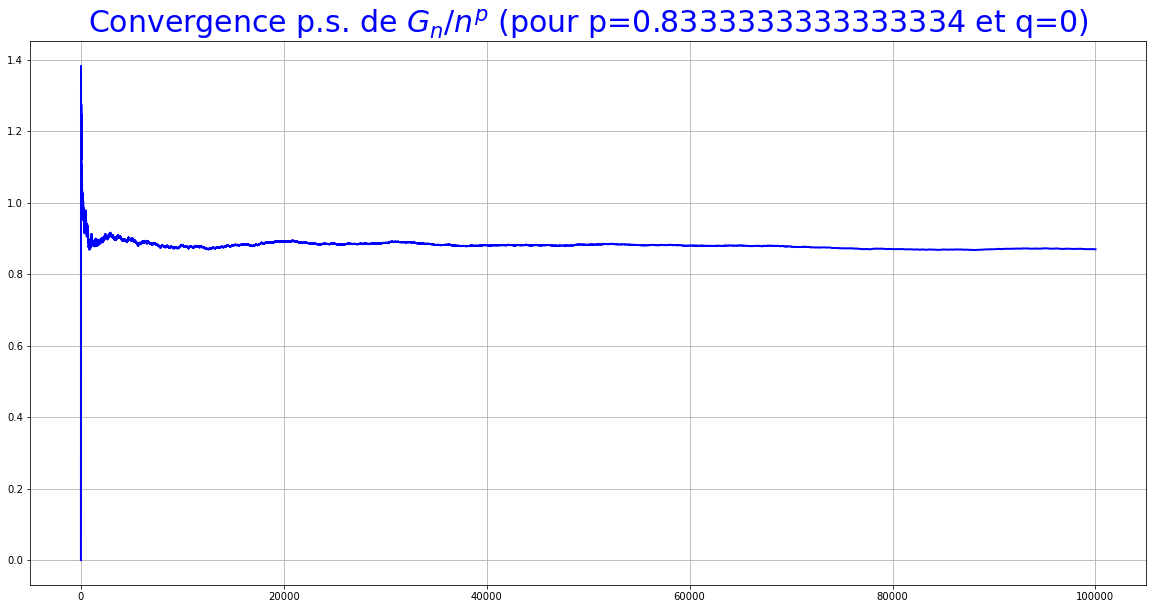

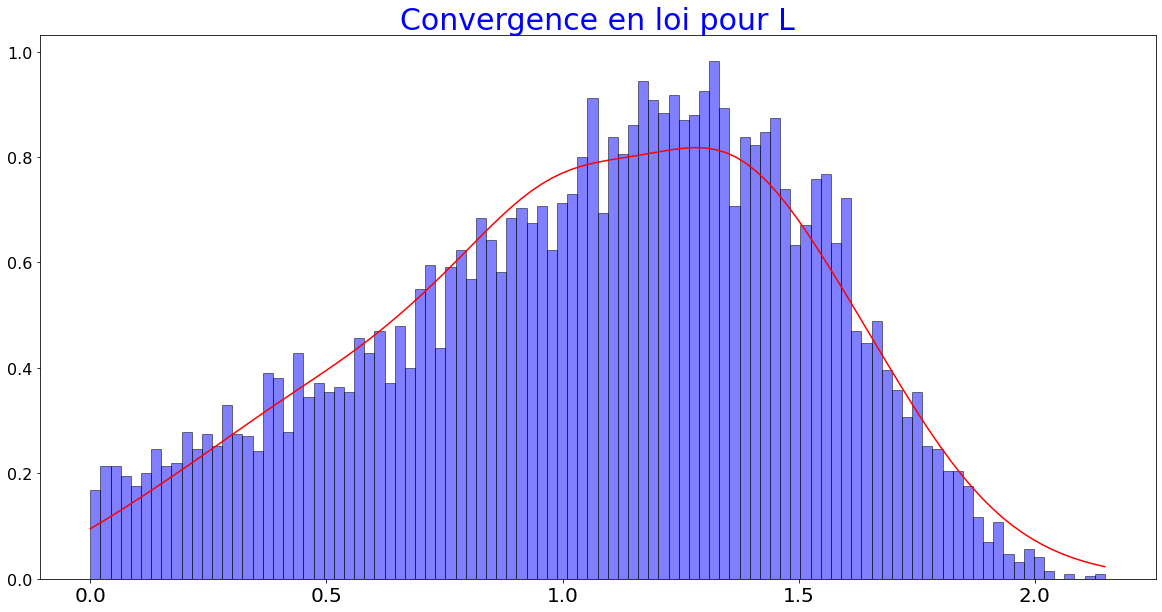

In [156]:
N = 10**5
n = 6
m = 5
p = m/n
q = 0
 
X = T(n,m,N)
h = empty(N)
alpha = 0.3
for i in range(N):
    h[i] = (1/(i+1))**alpha
s = 1
 
a = ones(N)
 
indices, steps_Xn, position_Sn, Gn, lim, lim2 = simulate_minimal_random_walk2(N,s,p,q)
plotting_convergence_ps_centre_de_masse_superdiffusif(N, indices, lim)
plotting_hist_cv_ps_centre_de_masse(10**3, 10**4,s,p,q,X,a,h)

# III- Marche aléatoire de l'éléphant avec stop 

$X_0=0$

$X_1 \sim \mathcal{R}\left(s\right)$ avec $s \in [0;1]$

On choisit au hasard et de façon équiprobable un instant k parmi tous les instants précédents (allant de $ 1 $ à $ n $), et on récupère le pas $ X_{k} $ qui lui est associé.

$X_{n+1}=\left\{\begin{array}{ccc}
+X_{k} & \text { avec probabilité } & p \\
-X_{k} & \text { avec probabilité } & q \\
0 &\text { avec probabilité } & r
\end{array}\right. $

où $p+q+r =1$ et $r \in (0,1)$

La position de la marche aléatoire de l'éléphant avec stop est donnée par : 

$S_0=0$, et pour tout $n \geq 1$
$$S_n = \sum_{k=1}^{n} X_k$$

On note : 
$$ \Sigma_n = \sum_{k=1}^{n} X_k^2 $$

Le paramètre de mémoire de cette marche est donné par :
$$a = \frac{p}{1-r}$$

Il y a 3 régimes : 
- Diffusif si $a<3/4$ 
- Critique si $a=3/4$
- Superdiffusif si $a>3/4$

## 1. Simulation de la marche aléatoire de l'éléphant avec stop

In [2]:
def Rademacher(p) :
    nb = random()
    if nb<p : r = 1
    else : r = -1
    return r

     

def simulate_ERWS(N,s,p,q):
    #r = 1 - (p+q)
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    position_Sigma_n = []
    lim = []
    #Gn = []
    steps_Xn.append([0])
    position_Sn.append(0)
    position_Sigma_n.append(0)
    lim.append(0)
    #Gn.append(0)
    
    for n in range (1,N) :
        if n==1 :
            new_step = Rademacher(s)
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            position_Sigma_n.append(new_step**2)
            lim.append(new_step**2)
            #Gn.append(mean(position_Sn))
        else : 
            k=randint(1,n-1)
            U=random()
            new_step = (-1)**(U<q) * steps_Xn[k] * (U<(1-r))
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            position_Sigma_n.append(position_Sigma_n[n-1]+new_step**2)
            lim.append(position_Sigma_n[n]/n**(1-r))
            #Gn.append(mean(position_Sn))
            
    #return indices, steps_Xn, position_Sn, position_Sigma_n, lim, centre
    return indices, steps_Xn, position_Sn, position_Sigma_n, lim

       
def plotting_ERWS(indices, position_Sn) : #rajouter Gn pour afficher le centre de masse 
    fig = plt.figure(figsize = (20,10))
    plt.plot(indices,position_Sn, 'blue', lw = 2)
    plt.title("Simulation la marche de l'éléphant avec stop (pour p="+ str(p) + " et q="+ str(q) + "et r=" +str(r)+")", fontsize = 30, color= "blue")
    #plt.plot(indices, Gn, 'red', lw=1)

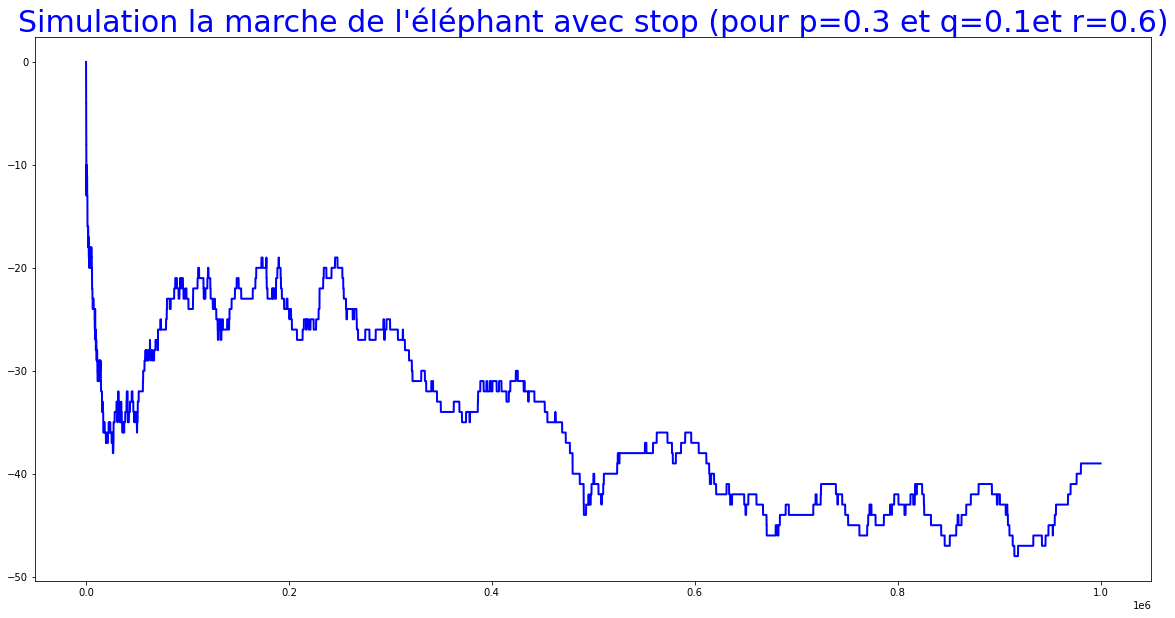

In [14]:
N = 10**6
s = 0.5
p = 0.3
q = 0.1
r = 0.6
indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
plotting_ERWS(indices, position_Sn)

## 2. Simulation de la convergence presque sûre 

Pour tout $p,q,r \in [0,1]$
$$\frac{1}{n^{1-r}}\Sigma_n \underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}\Sigma$$    
avec $\Sigma$ une variable aléatoire qui suit une loi de Mittag-Leffler de paramètre $1-r$ 

In [53]:
def plotting_convergence_ps_ERWS(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2) #lim*np.array(mp.gamma(2-r))
    plt.title("Convergence p.s. de $\Sigma_n/n^{1-r}$ (pour p="+ str(p) + " et q="+ str(q) + "et r=" +str(r)+")", fontsize = 30, color= "blue")
    plt.show()

def plotting_hist_cv_ps_ERWS(N, rep,s,p,q): 
    list_lim2 = []
    list_lim2.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
        lim2 = lim[N-1]
        list_lim2.append(lim2)
    
    plt.figure(figsize=(20,10))
    plt.title("Convergence en loi de $\Sigma$ (pour p="+ str(p) + " et q="+ str(q) + "et r=" +str(r)+")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim2)))
    plt.hist(list_lim2, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    x = linspace(min(list_lim2), max(list_lim2), 100)
    y = 1/(sqrt(pi))*exp(- x**2/4)
    plt.plot(x, y,'r')

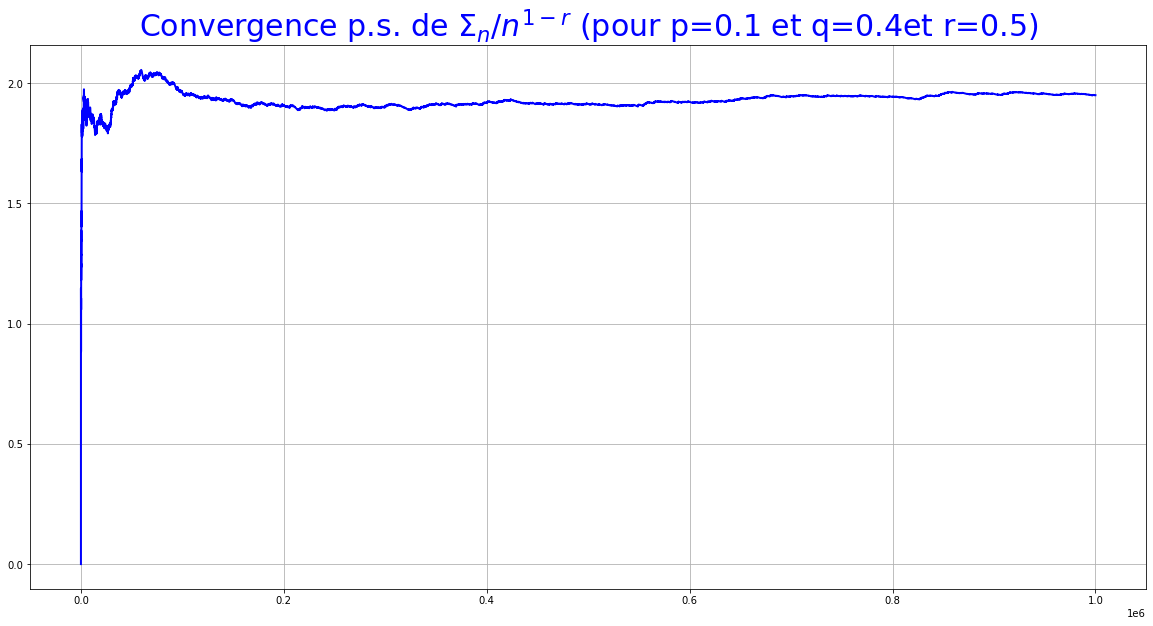

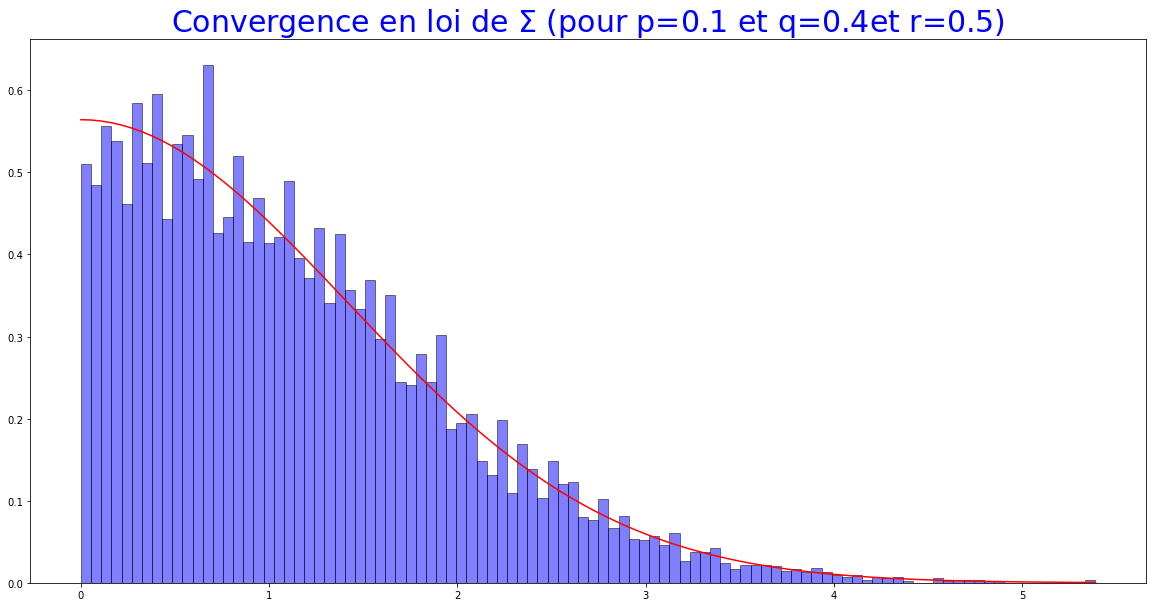

In [54]:
N = 10**6
s = 1/2
p = 0.1
q = 0.4
r = 1 - (p+q)
indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
plotting_convergence_ps_ERWS(N, indices, lim)
rep = 10**4
indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
plotting_hist_cv_ps_ERWS(10**4, rep,s,p,q)

Le premier graphique montre qu'il y a bien une convergence. \
Or, il s'agit d'une convergence vers une variable aléatoire donc l'affichage en histogramme est nécessaire pour vérifier qu'il s'agit d'une distribution de Mittag-Leffler de paramètre $1-r$. \
Nous avons choisi de prendre nos paramètres $p$ et $q$ de telle sorte que $r=1/2$. \
En effet, nous avons vu dans la section précédente que, dans ce cas là, $\Sigma$ a la même distribution que $|Z|$ où $Z$ suit une loi normale $\mathcal{N}\left(0,2\right)$. \
Nous obtenons alors l'histogramme du 2ème graphique.

Pour d'autres paramètres :

okay
okay
okay
okay
okay
okay
yep
yep
yep


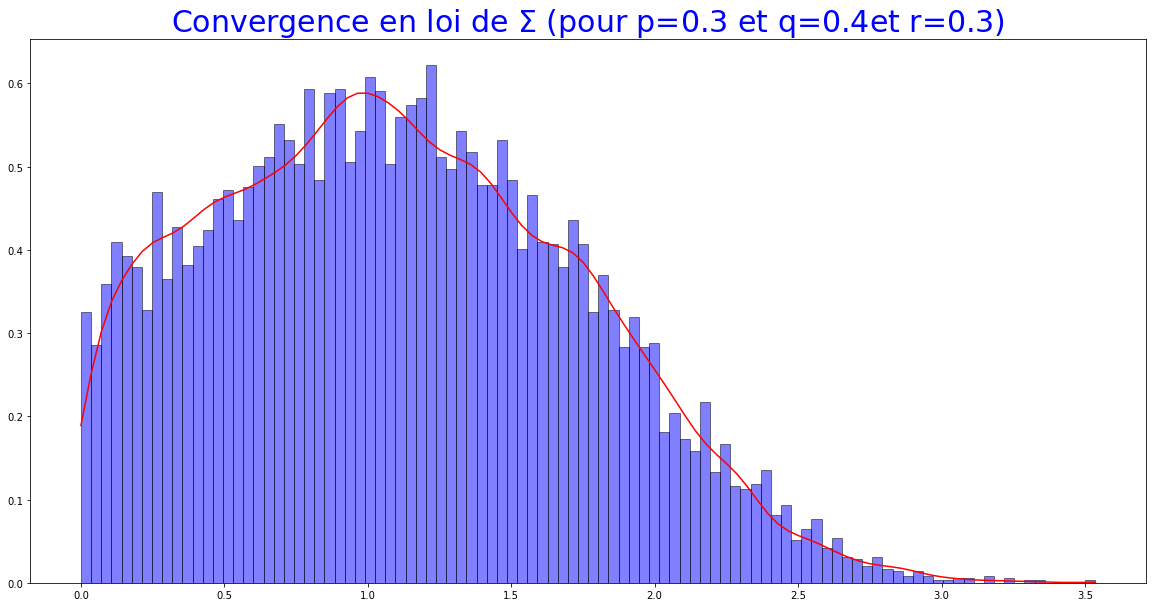

In [118]:
def plotting_hist_cv_ps_ERWS2(N, rep,s,p,q,X,a,h): 
    list_lim2 = []
    list_lim2.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
        lim2 = lim[N-1]
        list_lim2.append(lim2)
    
    plt.figure(figsize=(20,10))
    plt.title("Convergence en loi de $\Sigma$ (pour p="+ str(p) + " et q="+ str(q) + "et r=" +str(r)+")", fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim2)))
    plt.hist(list_lim2, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
    x = linspace(min(list_lim2), max(list_lim2), 100)
    y = f1_chapeau(x, X, a, h, s, N)
    plt.plot(x, y,'r')
    
N = 10**6
n = 10
m = 7
r = 0.3
p = 0.3
q = 0.4
 
X = T(n,m,N)
h = empty(N)
alpha = 0.3
for i in range(N):
    h[i] = (1/(i+1))**alpha
s = 1
 
a = ones(N)
 
indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS2(10**4, rep,s,p,q,X,a,h)

## 3. Régime diffusif ($a<3/4$)

### 3.1. Convergence presque sûre 

$$\frac{S_n}{n} \underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}0$$ 

In [14]:
def simulate_ERWS1(N,s,p,q):
    r = 1-(p+q)
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    lim = []
    steps_Xn.append([0])
    position_Sn.append(0)
    lim.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = Rademacher(s)
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            lim.append(new_step)
        else : 
            k=randint(1,n-1)
            U=random()
            new_step = (-1)**(U<q) * steps_Xn[k] * (U<(1-r))
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            lim.append(position_Sn[n]/n)
            
    return indices, steps_Xn, position_Sn, lim

def plotting_convergence_ps_ERWS_diffusif(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2) 
    plt.title("Convergence p.s. de $S_n/n$ pour le cas diffusif (avec p="+ str(p) + " et q="+ str(q) +")", fontsize = 30, color= "blue")#+ "et r=" +str(r)
    l=[]
    for i in range(0,N) : 
        l.append(0)
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()

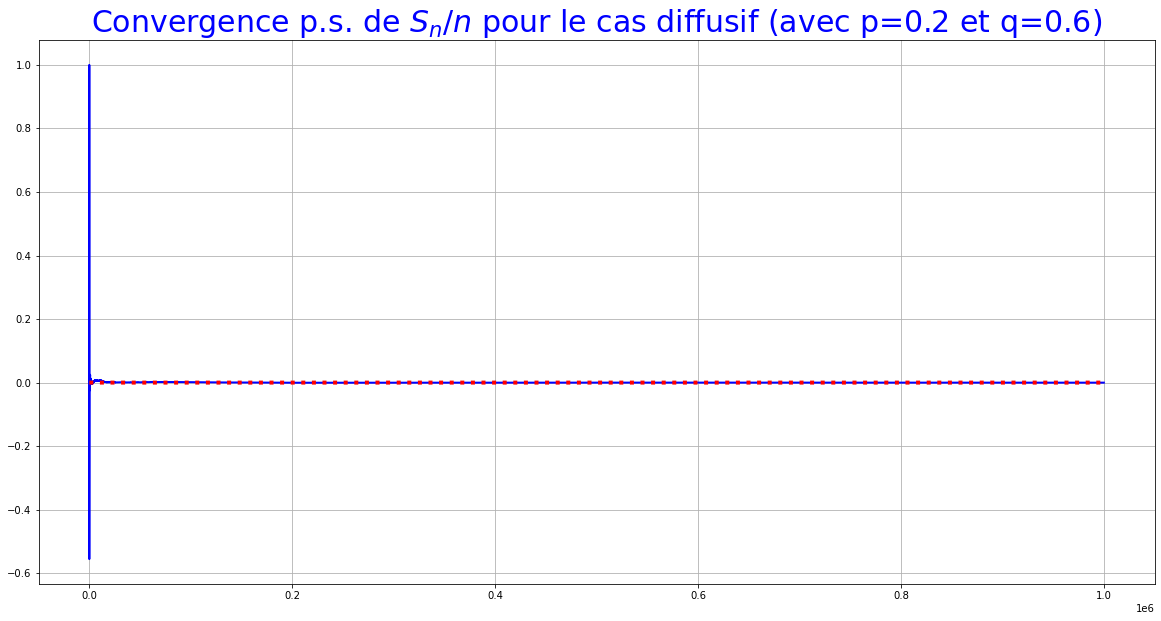

In [109]:
N = 10**6
s = 0.5
p = 0.2
q = 0.6
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS1(N,s,p,q)
plotting_convergence_ps_ERWS_diffusif(N, indices, lim)

### 3.2. Normalités asymptotiques

#### n°1

$$ \frac{S_n}{\sqrt{\Sigma_n}} \underset{n \to +\infty}{\overset{\mathcal{L}} {\longrightarrow}} \mathcal{N} \left(0, \sigma_r^2\right)$$

avec $\sigma_r^2 = \frac{1-r}{3\left(1-r\right)-4p}$

In [11]:
def simulate_ERWS2(N,s,p,q):
    r=1-(p+q)
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    position_Sigma_n = []
    lim = []
    steps_Xn.append([0])
    position_Sn.append(0)
    position_Sigma_n.append(0)
    lim.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = Rademacher(s)
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            position_Sigma_n.append(new_step**2)
            lim.append(new_step/sqrt(new_step**2))
        else : 
            k=randint(1,n-1)
            U=random()
            new_step = (-1)**(U<q) * steps_Xn[k] * (U<(1-r))
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            position_Sigma_n.append(position_Sigma_n[n-1]+new_step**2)
            lim.append(position_Sn[n]/(sqrt(position_Sigma_n[n])))
            
    return indices, steps_Xn, position_Sn, position_Sigma_n, lim

def asymptotic_normality_ERWS_diffusif1(repetition, N, p, q):

    list_conv_loi = []
    
    for i in range(repetition):
        indices, steps_Xn, position_Sn, position_Sigma_n, lim = simulate_ERWS2(N,s,p,q)
        lim = lim[N-1]
        cv_loi = lim
        list_conv_loi.append(cv_loi)

   
    plt.figure(figsize = (20,10))
    plt.title('Convergence en loi pour le cas diffusif (avec p ='+ str(p) +' , q='+ str(q)  + ')', fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_conv_loi)))
    plt.hist(list_conv_loi, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")
        
    x = linspace(min(list_conv_loi), max(list_conv_loi), 100)
    y = scipy.stats.norm.pdf(x, 0, sqrt((1-r)/(3*(1-r)-4*p)))
    plt.plot(x, y,'r')
    plt.show()

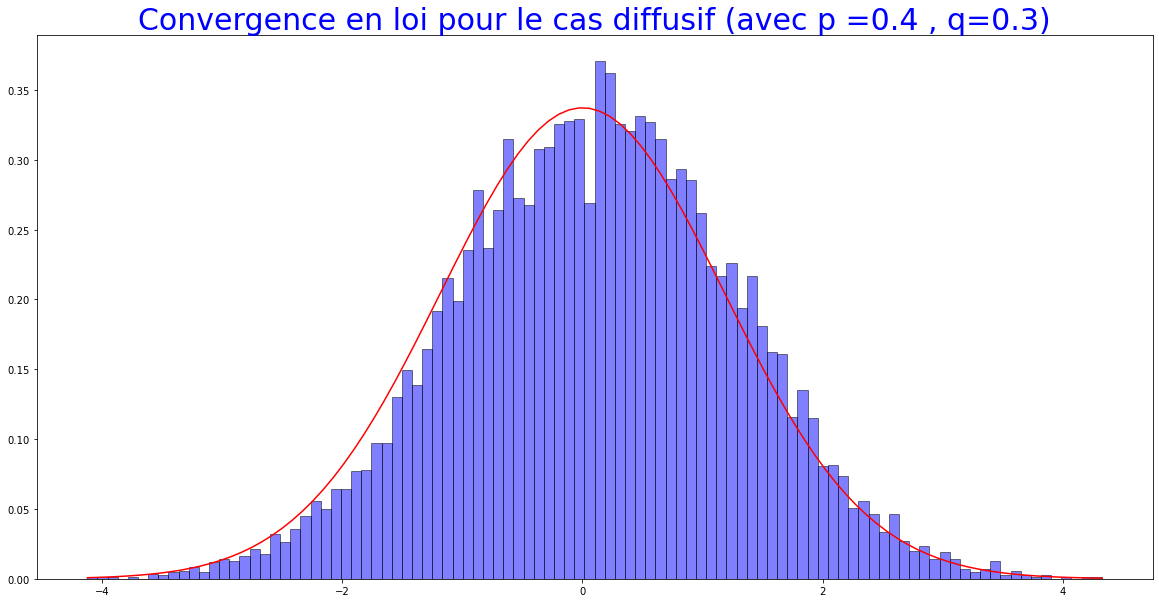

In [12]:
N = 10**4
repetition = 10**4
s = 1
p = 0.4
q = 0.3
r = 1-(p+q)
asymptotic_normality_ERWS_diffusif1(repetition, N, p, q)

## 4. Régime critique ($a=3/4$)

### 4.1. Convergence presque sûre 

$$\frac{S_n}{n} \underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}0$$ 

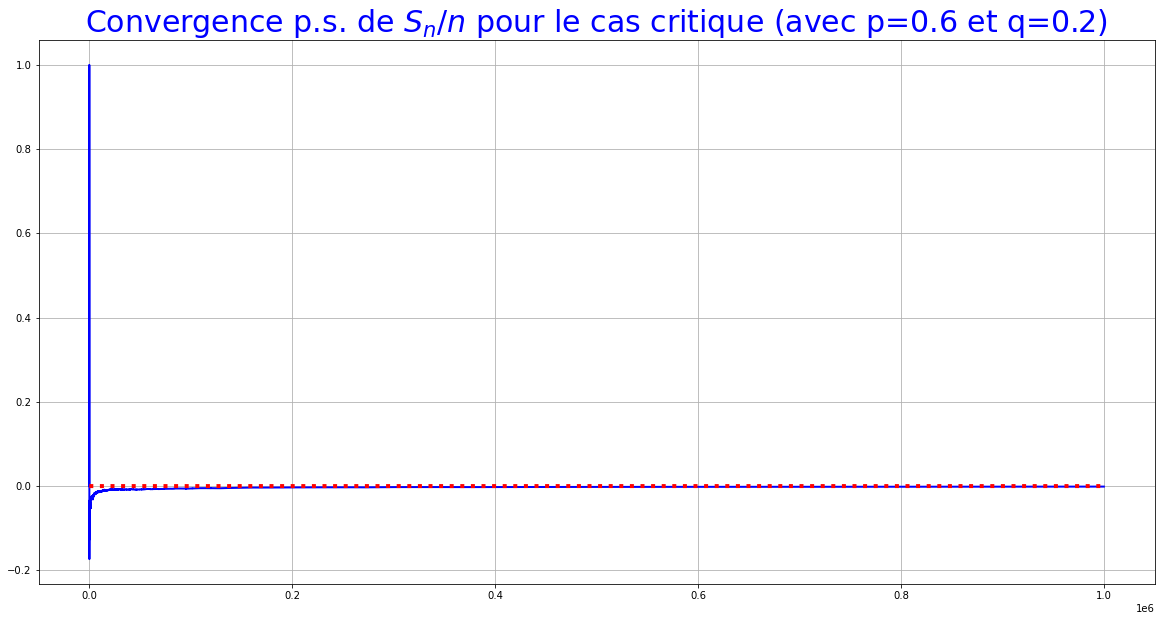

In [19]:
def plotting_convergence_ps_ERWS_critique(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2) 
    plt.title("Convergence p.s. de $S_n/n$ pour le cas critique (avec p="+ str(p) + " et q="+ str(q)  +")", fontsize = 30, color= "blue")
    l=[]
    for i in range(0,N) : 
        l.append(0)
    plt.plot(indices,l, 'r:', lw=4)
    plt.show()
    
N = 10**6
s = 1
p = 0.6
q = 0.2
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS1(N,s,p,q)
plotting_convergence_ps_ERWS_critique(N, indices, lim)

### 4.2. Normalités asymptotiques

#### n°1

$$ \frac{S_n}{\sqrt{\Sigma_nlog\Sigma_n}} \underset{n \to +\infty}{\overset{\mathcal{L}} {\longrightarrow}} \mathcal{N} \left(0, 1\right)$$

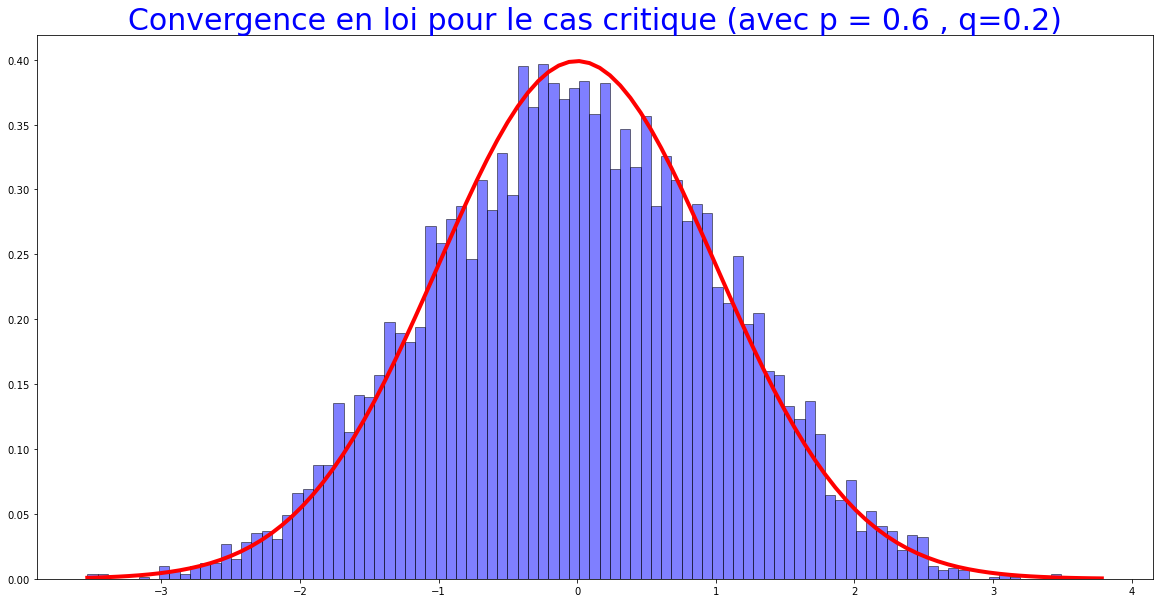

In [23]:
N = 10**3
p = 0.6
r = 0.2
q = 0.2
X = empty(N)
j = arange(N)
K = 10**4
U = floor((j+1)*npr.rand(N)) ## création d'un vecteur aléatoire d'entier entre 0 et j
S = zeros(N)
W = []

for k in range(K):
    X[0] = 2*(npr.rand()<1/2) - 1  ## Initialisation de X_0
    Conv = X[0]**2
    for i in range(N-1):
        u = npr.rand()  ## création d'un nombre aléatoire qui permettra de rendre la création de (X_n) aléatoire
        X[i+1] = (-1)**(u<q) * X[int(U[i])]*(u<(1-r))  ## Création de la suite (X_n)
        S[i+1] = S[i] + X[i]
        Conv = Conv + X[i+1]**2 ## Somme des pas carrés
    if X[1] != 0:
        W= append(W,S[N-1]/sqrt((Conv)*log(Conv))) ## Création d'un vecteur comprenant valeurs de (S_N / Sc_N*log(Sc_N) ) pour chaque itération

Wbarre = 0  ## moyenne de W car on sait que ça doit suivre une N centrée
Wvar = 1  ## Variance de W car on sait ce que la variance vaut 
#sum((W-Wbarre)**2)/K

plt.figure(figsize=(20,10))
plt.title('Convergence en loi pour le cas critique (avec p = '+ str(p) +' , q='+ str(q)  + ')', fontsize = 30, color ='blue')
plt.hist(W,bins = linspace(min(W),max(W),100), density = True, facecolor='b', alpha=0.5,edgecolor="black") ## Affichage de l'histogramme de W entre ses valeurs minimale et maximale
x = linspace(min(W),max(W),100)
plt.plot(x, exp(-((x-Wbarre)**2)/(2*Wvar))/sqrt(2*pi*Wvar), lw = 4, color = "red") ## Affichage de la densité 

## 5. Régime super diffusif ($a>3/4$)

### 5.1. Convergence presque sûre 

$$ \frac{S_n}{n^{2p+r-1}} \underset{n \to +\infty}{\overset{ps} {\longrightarrow}} L$$
où $L$ est une variable aléatoire non-dégénérée. 

In [135]:
def simulate_ERWS3(N,s,p,q):
    r = 1-(p+q)
    indices = [*range(0,N,1)]
    steps_Xn = []
    position_Sn = []
    lim = []
    steps_Xn.append(0)
    position_Sn.append(0)
    lim.append(0)
    for n in range (1,N) :
        if n==1 :
            new_step = Rademacher(s)
            steps_Xn.append(new_step)
            position_Sn.append(new_step)
            lim.append(new_step)
        else : 
            k=randint(1,n-1)
            U=random()
            new_step = (-1)**(U<q) * steps_Xn[k] * (U<(1-r))
            steps_Xn.append(new_step)
            position_Sn.append(position_Sn[n-1]+new_step)
            lim.append(position_Sn[n]/n**(2*p+r-1))
            
    return indices, steps_Xn, position_Sn, lim

def plotting_convergence_ps_ERWS_superdiffusif(N, indices, lim) :
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(indices, lim, 'blue',lw=2) 
    plt.title('Convergence p.s. de $S_n/n^{2p+r-1}$ dans le régime superdiffusif (pour p=' + str(p) + ' , q='+ str(q) + ' et r=' +str(r)+ ")", fontsize = 30, color= "blue")
    plt.show()
    
def plotting_hist_cv_ps_ERWS_superdiffusif(N, rep,s,p,q): 
    list_lim2 = []
    list_lim2.append(0)
    for i in range(rep):
        indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
        lim2 = lim[N-1]
        list_lim2.append(lim2)
    
    plt.figure(figsize=(20,10))
    plt.title('Convergence en loi de $L$ (pour p ='+ str(p) +' et q='+ str(q) + ')', fontsize = 30, color ='blue')
    nb_bins = int(sqrt(len(list_lim2)))
    plt.hist(list_lim2, nb_bins, density = True, facecolor='b', alpha=0.5,edgecolor="black")

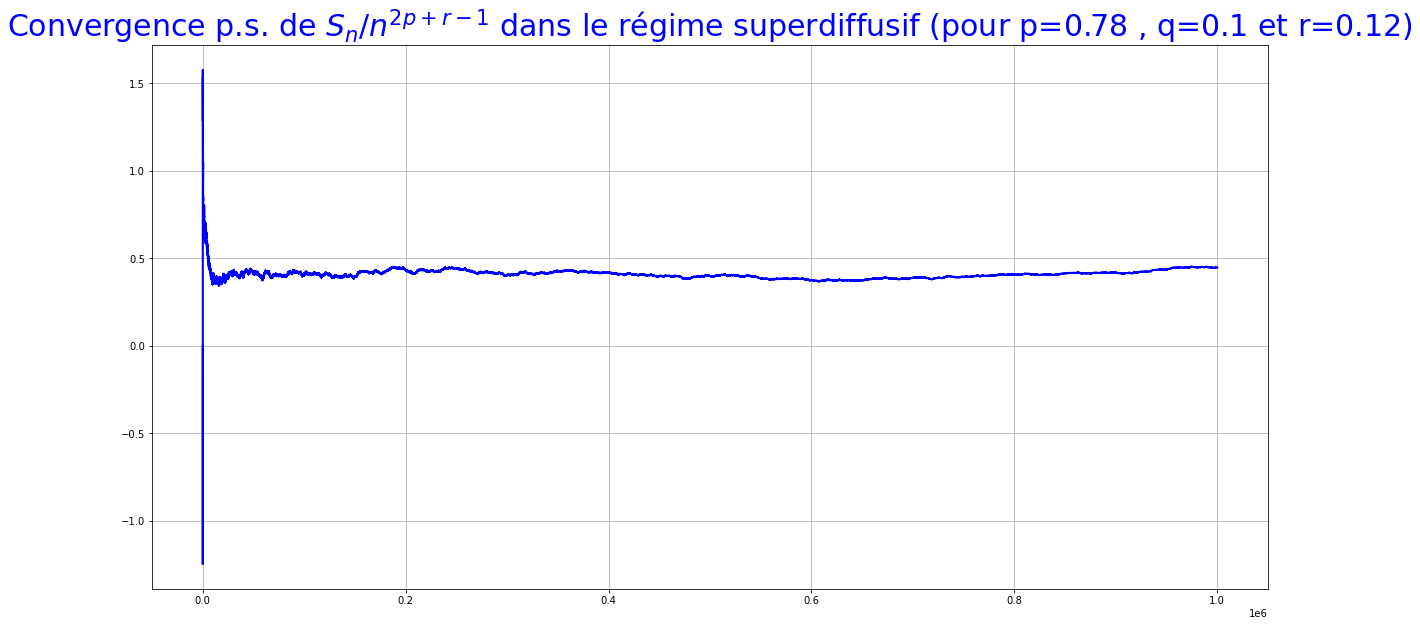

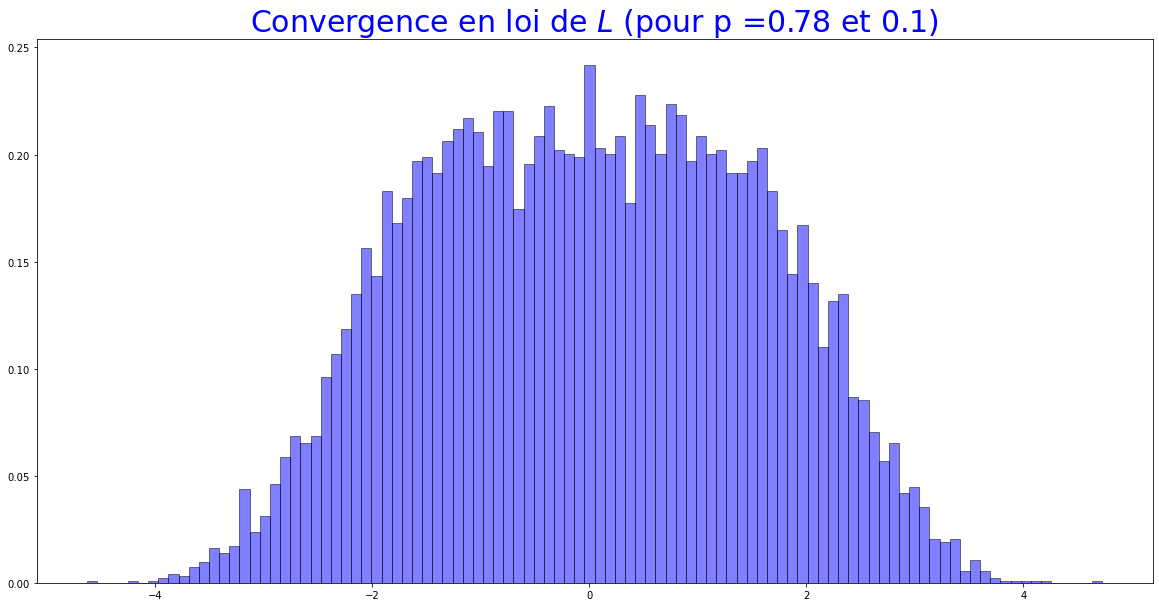

In [87]:
N = 10**6
s = 1/2
p = 0.78
q = 0.1
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
plotting_convergence_ps_ERWS_superdiffusif(N, indices, lim)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

Le premier graphique ci-dessus indique bien une convergence.
Or, il s’agit d’une convergence vers une variable aléatoire donc l’affichage en histogramme est nécessaire pour observer la distribution de L (deuxième graphique).

Testons pour plusieurs valeurs de $p$ et $r$ en laissant $q=0.1$

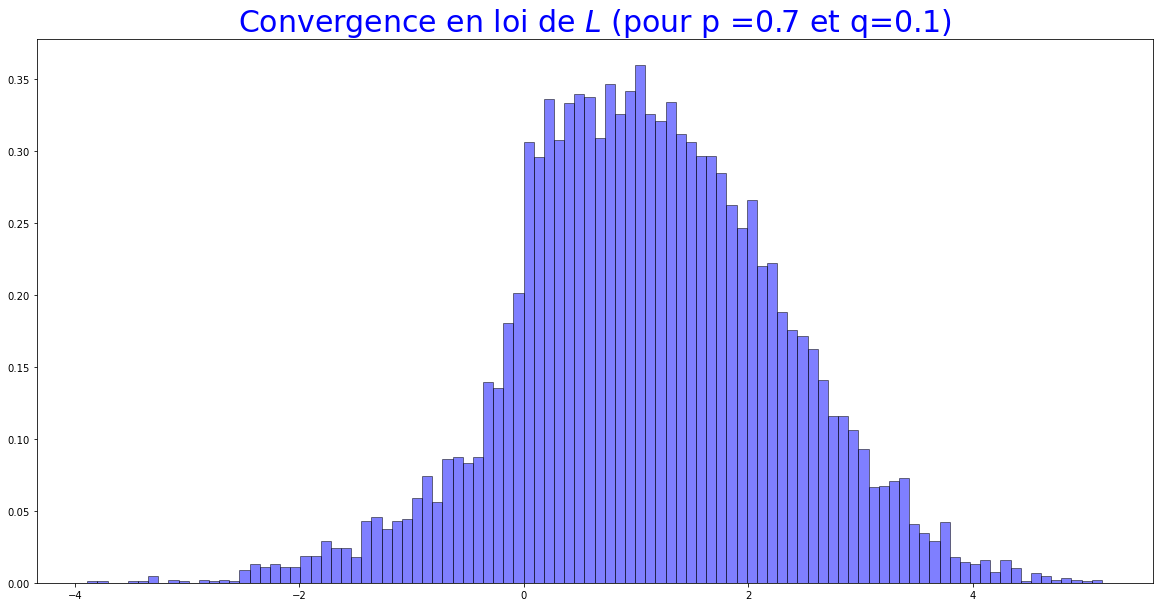

In [139]:
N = 10**6
s = 1
p = 0.7
q = 0.1
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

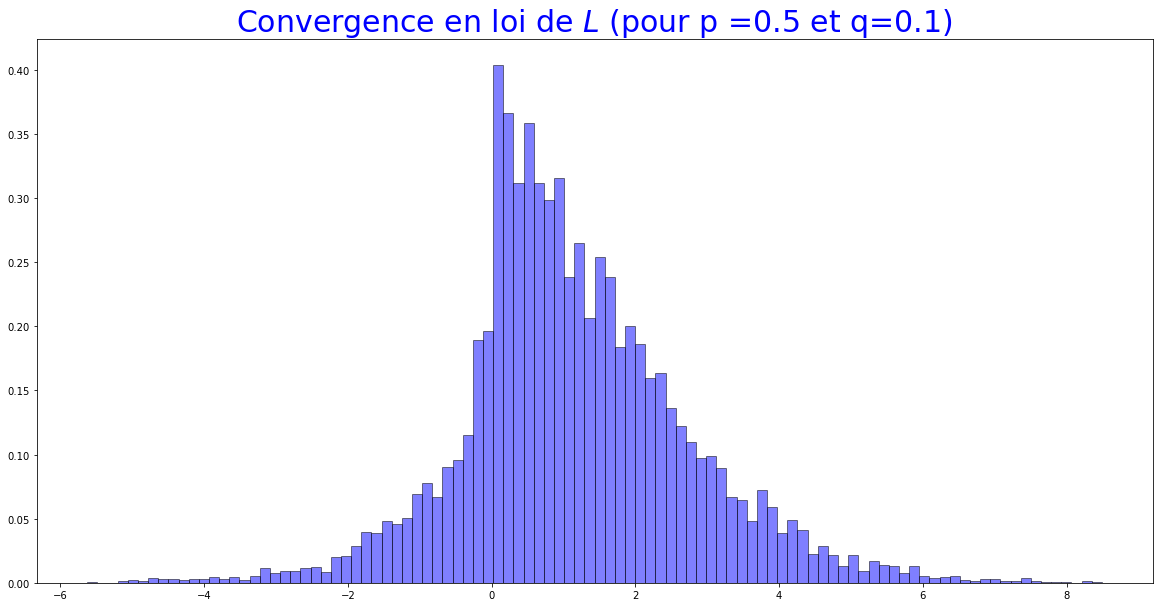

In [140]:
N = 10**6
s = 1
p = 0.5
q = 0.1
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

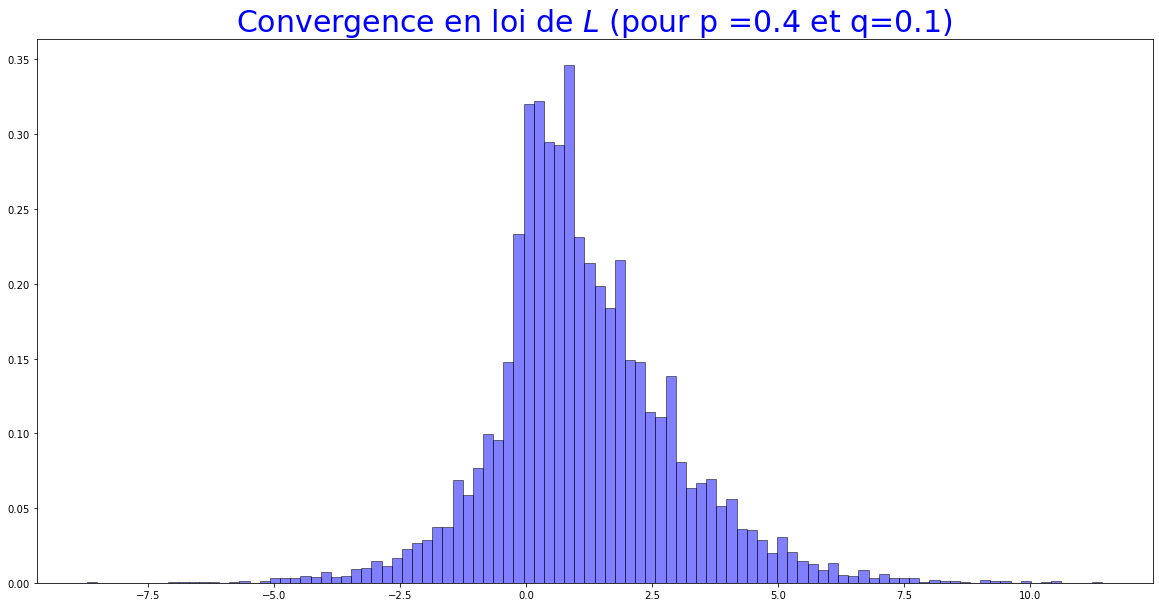

In [141]:
N = 10**6
s = 1
p = 0.4
q = 0.1
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

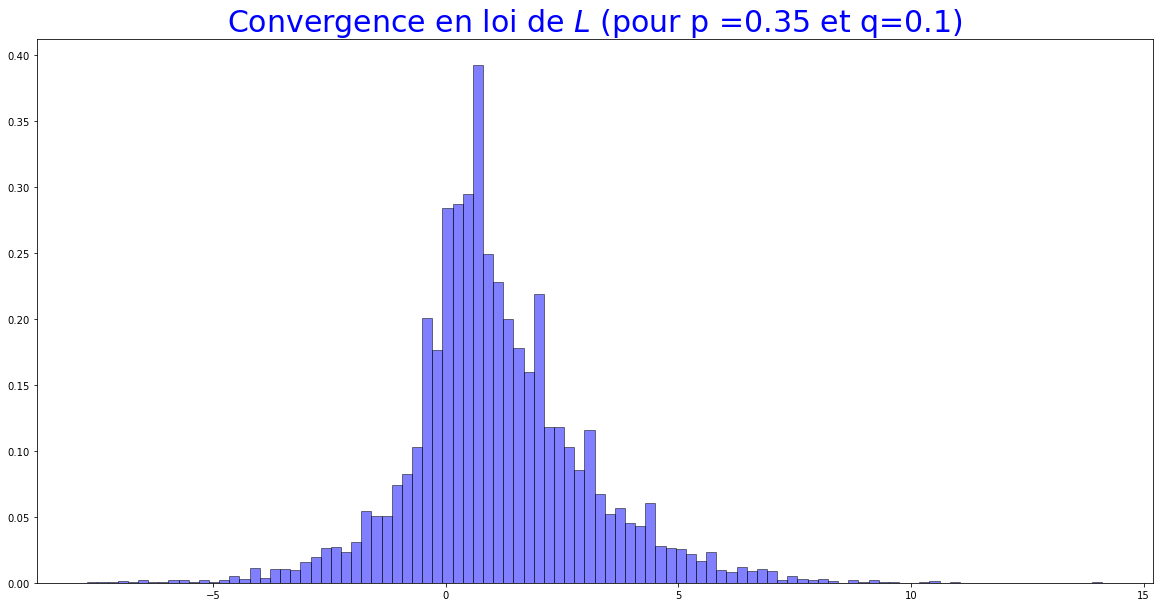

In [143]:
N = 10**6
s = 1
p = 0.35
q = 0.1
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

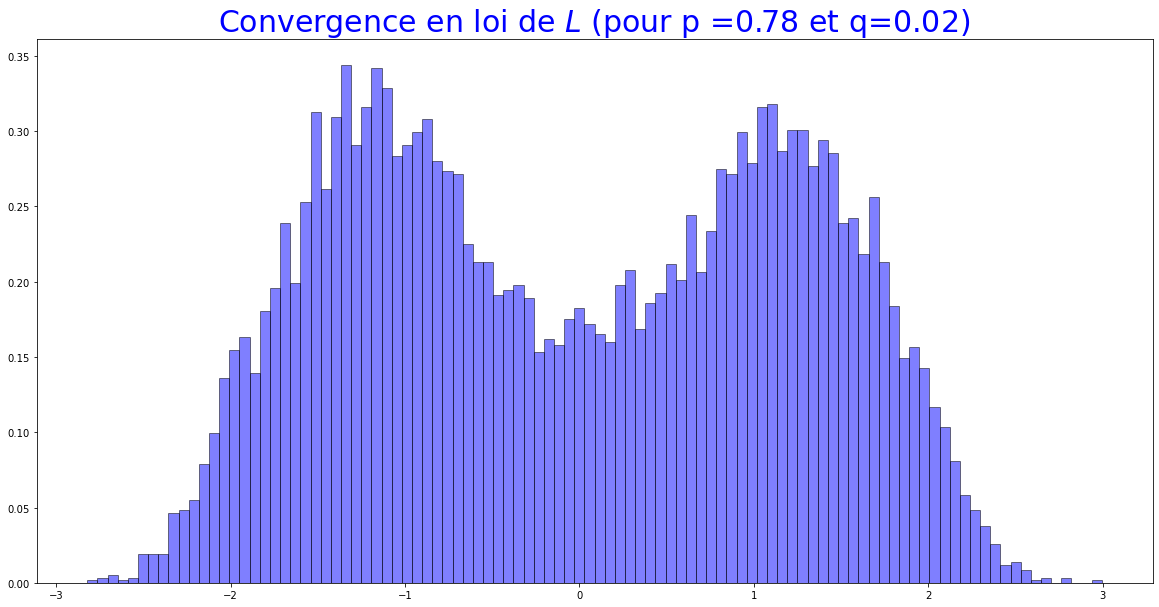

In [142]:
N = 10**6
s = 1/2
p = 0.78
q = 0.02
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)

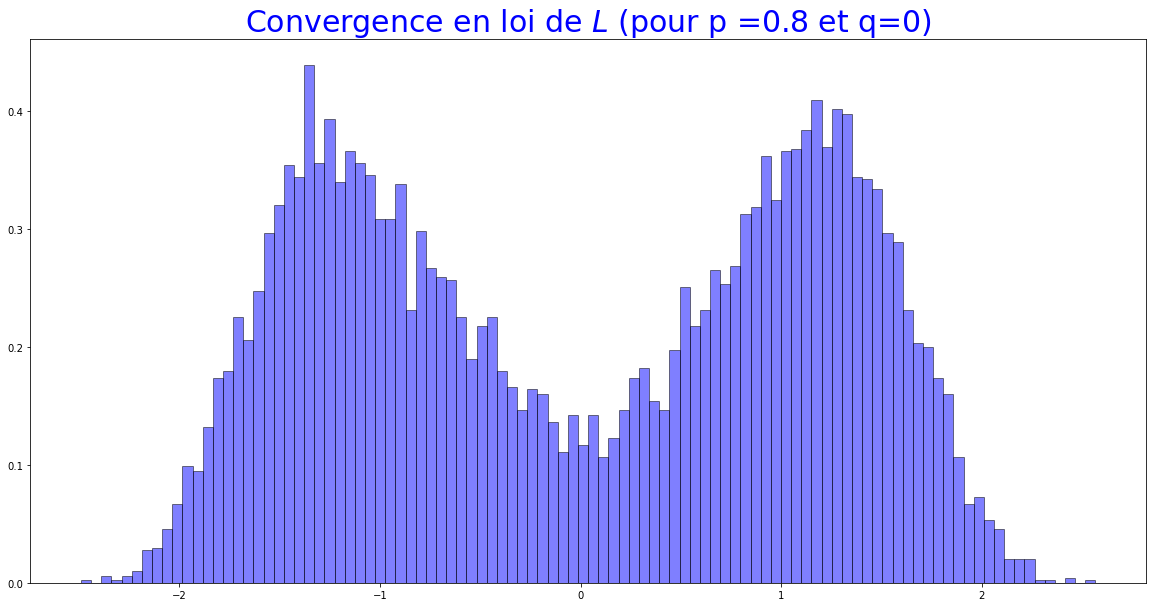

In [138]:
N = 10**6
s = 1/2
p = 0.8
q = 0
r = 1 - (p+q)
indices, steps_Xn, position_Sn, lim = simulate_ERWS3(N,s,p,q)
rep = 10**4
plotting_hist_cv_ps_ERWS_superdiffusif(10**4, rep,s,p,q)